# Generazione Rumore Artificiale (Serie Singola)

Carichiamo una seria EndOfDay e popoliamo alcuni campi aggiuntivi:

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filename = "HD_Daily.txt"

startDate = "20000101"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Vol'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['Range'] = round(instrument['High'] - instrument['Low'],2)
instrument['Body'] = abs(instrument['Open'] - instrument['Close'])
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(10)

Il file contiene 4682 record


,Open,High,Low,Close,Vol,AvgPrice,Range,Body,OpenClose,OpenClosePerc,DeltaClosePerc
Date_Time,,,,,,,,,,,
2000-01-03 16:00:00,68.63,69.19,63.81,65.19,12030600,66.70,5.38,3.44,-3.44,-5.01,NaN
2000-01-04 16:00:00,64.00,64.31,61.19,61.69,8722000,62.80,3.12,2.31,-2.31,-3.61,-5.37
2000-01-05 16:00:00,61.75,63.00,61.00,62.00,6939800,61.94,2.00,0.25,0.25,0.40,0.50
2000-01-06 16:00:00,61.63,62.00,60.00,60.00,6607600,60.91,2.00,1.63,-1.63,-2.64,-3.23
2000-01-07 16:00:00,61.75,63.50,60.75,63.50,6207300,62.38,2.75,1.75,1.75,2.83,5.83
2000-01-10 16:00:00,62.00,63.56,62.00,63.19,5455400,62.69,1.56,1.19,1.19,1.92,-0.49
2000-01-11 16:00:00,63.44,63.63,61.25,61.56,4371600,62.47,2.38,1.88,-1.88,-2.96,-2.58
2000-01-12 16:00:00,61.56,62.06,60.69,61.06,4629400,61.34,1.37,0.50,-0.50,-0.81,-0.81
2000-01-13 16:00:00,62.13,62.50,61.50,62.13,4538900,62.06,1.00,0.00,0.00,0.00,1.75


Calcoliamo le statistiche delle serie importate:

In [2]:
instrument.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,4681.0,6.262071e+01,4.408440e+01,17.74,33.88,41.43,78.81,207.23
High,4681.0,6.322779e+01,4.432258e+01,18.60,34.34,41.96,79.40,207.61
Low,4681.0,6.200205e+01,4.383873e+01,17.05,33.48,41.00,78.31,204.71
Close,4681.0,6.262888e+01,4.409429e+01,18.00,33.87,41.50,78.72,207.23
Vol,4681.0,1.010005e+07,6.988861e+06,100.00,5412659.00,7965800.00,12611204.00,94536971.00
AvgPrice,4681.0,6.261978e+01,4.408262e+01,18.10,33.88,41.48,78.89,206.14
Range,4681.0,1.225736e+00,9.742639e-01,0.17,0.65,0.96,1.51,23.71
Body,4681.0,5.993890e-01,6.826895e-01,0.00,0.18,0.40,0.77,12.42
OpenClose,4681.0,8.169195e-03,9.084835e-01,-9.92,-0.39,0.00,0.41,12.42
OpenClosePerc,4681.0,2.555437e-02,1.653605e+00,-6.98,-0.77,0.00,0.78,12.98


Aggiungiamo ulteriori valori percentili:

In [3]:
instrument.describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]).transpose()

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Open,4681.0,6.262071e+01,4.408440e+01,17.74,27.05,31.85,35.52,38.12,41.43,49.36,65.50,98.15,134.73,207.23
High,4681.0,6.322779e+01,4.432258e+01,18.60,27.50,32.25,35.96,38.45,41.96,49.88,66.70,98.87,135.46,207.61
Low,4681.0,6.200205e+01,4.383873e+01,17.05,26.65,31.52,35.17,37.68,41.00,48.60,64.29,97.09,133.77,204.71
Close,4681.0,6.262888e+01,4.409429e+01,18.00,27.09,31.81,35.54,38.06,41.50,49.26,65.47,98.14,134.58,207.23
Vol,4681.0,1.010005e+07,6.988861e+06,100.00,4060994.00,5011045.00,5881432.00,6889100.00,7965800.00,9481258.00,11486234.00,14083557.00,18693100.00,94536971.00
AvgPrice,4681.0,6.261978e+01,4.408262e+01,18.10,27.07,31.86,35.55,38.06,41.48,49.31,65.59,98.24,134.66,206.14
Range,4681.0,1.225736e+00,9.742639e-01,0.17,0.48,0.59,0.70,0.82,0.96,1.13,1.37,1.68,2.25,23.71
Body,4681.0,5.993890e-01,6.826895e-01,0.00,0.07,0.14,0.22,0.30,0.40,0.52,0.68,0.92,1.33,12.42
OpenClose,4681.0,8.169195e-03,9.084835e-01,-9.92,-0.89,-0.51,-0.29,-0.13,0.00,0.14,0.31,0.54,0.93,12.42
OpenClosePerc,4681.0,2.555437e-02,1.653605e+00,-6.98,-1.76,-1.01,-0.58,-0.27,0.00,0.29,0.60,1.01,1.72,12.98


Creiamo una funzione che consenta di aggiungere rumore ad una singola serie:

In [4]:
def single_noise_adder(array, single_range, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_array = np.zeros(len(array))
    i = 0
    while i < len(array):
        factor = np.random.uniform(-1, 1)
        new_array[i] = round(float(array[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range[i])), 2)
        i += 1
    return new_array

instrument['Noisy_Close'] = single_noise_adder(instrument['Close'],instrument['Range'],100)
instrument['Noisy_OpenClosePerc'] = round((instrument['Noisy_Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['Noisy_DeltaClosePerc'] = round((instrument['Noisy_Close'] - instrument['Noisy_Close'].shift(1)) / instrument['Noisy_Close'].shift(1) * 100,2)

instrument.head(10)

,Open,High,Low,Close,Vol,AvgPrice,Range,Body,OpenClose,OpenClosePerc,DeltaClosePerc,Noisy_Close,Noisy_OpenClosePerc,Noisy_DeltaClosePerc
Date_Time,,,,,,,,,,,,,,
2000-01-03 16:00:00,68.63,69.19,63.81,65.19,12030600,66.70,5.38,3.44,-3.44,-5.01,NaN,70.09,2.13,NaN
2000-01-04 16:00:00,64.00,64.31,61.19,61.69,8722000,62.80,3.12,2.31,-2.31,-3.61,-5.37,62.30,-2.66,-11.11
2000-01-05 16:00:00,61.75,63.00,61.00,62.00,6939800,61.94,2.00,0.25,0.25,0.40,0.50,61.14,-0.99,-1.86
2000-01-06 16:00:00,61.63,62.00,60.00,60.00,6607600,60.91,2.00,1.63,-1.63,-2.64,-3.23,61.41,-0.36,0.44
2000-01-07 16:00:00,61.75,63.50,60.75,63.50,6207300,62.38,2.75,1.75,1.75,2.83,5.83,66.16,7.14,7.73
2000-01-10 16:00:00,62.00,63.56,62.00,63.19,5455400,62.69,1.56,1.19,1.19,1.92,-0.49,64.17,3.50,-3.01
2000-01-11 16:00:00,63.44,63.63,61.25,61.56,4371600,62.47,2.38,1.88,-1.88,-2.96,-2.58,60.59,-4.49,-5.58
2000-01-12 16:00:00,61.56,62.06,60.69,61.06,4629400,61.34,1.37,0.50,-0.50,-0.81,-0.81,61.59,0.05,1.65
2000-01-13 16:00:00,62.13,62.50,61.50,62.13,4538900,62.06,1.00,0.00,0.00,0.00,1.75,62.09,-0.06,0.81


Confrontiamo le distribuzioni per essere certi di non averle snaturate:

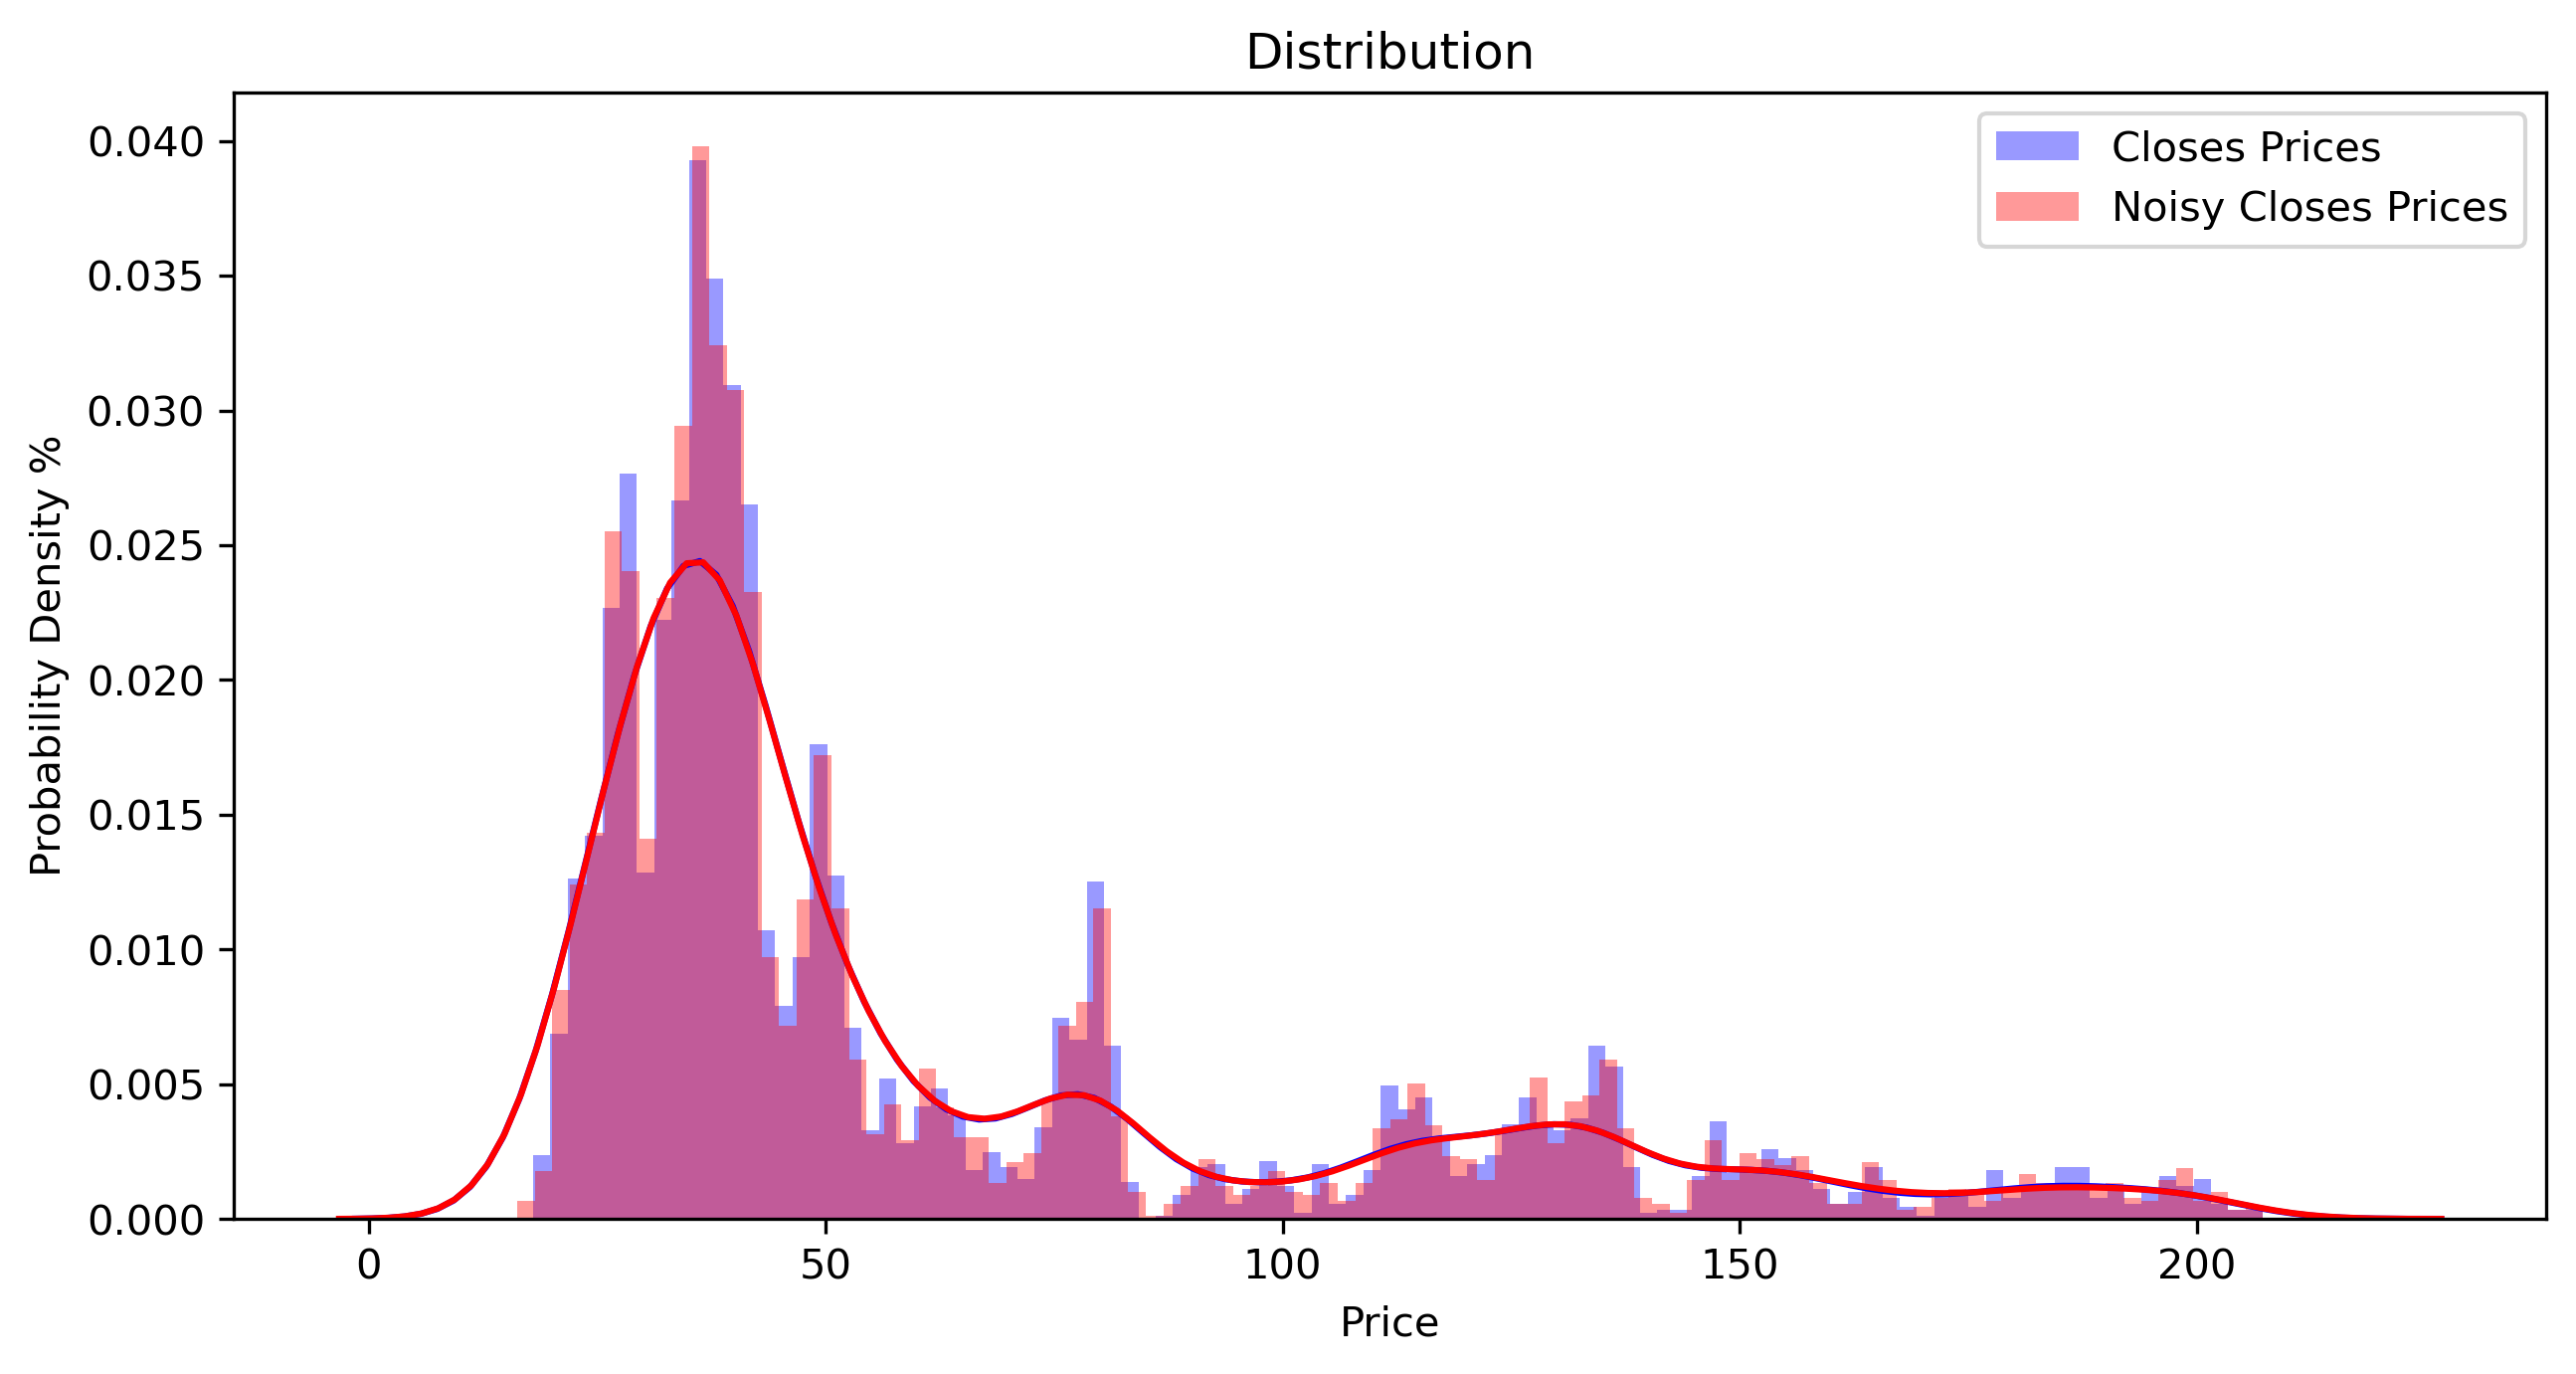

In [5]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(instrument['Close'], bins=100, color='b', label='Closes Prices')
sns.distplot(instrument['Noisy_Close'], bins=100, color='r', label='Noisy Closes Prices')
plt.title("Distribution")
plt.xlabel("Price")
plt.ylabel("Probability Density %")
plt.legend()
plt.show()

Grafichiamo la distribuzione delle variazioni percentuali intraday ed overnight della serie originale e di quella rumorosa:

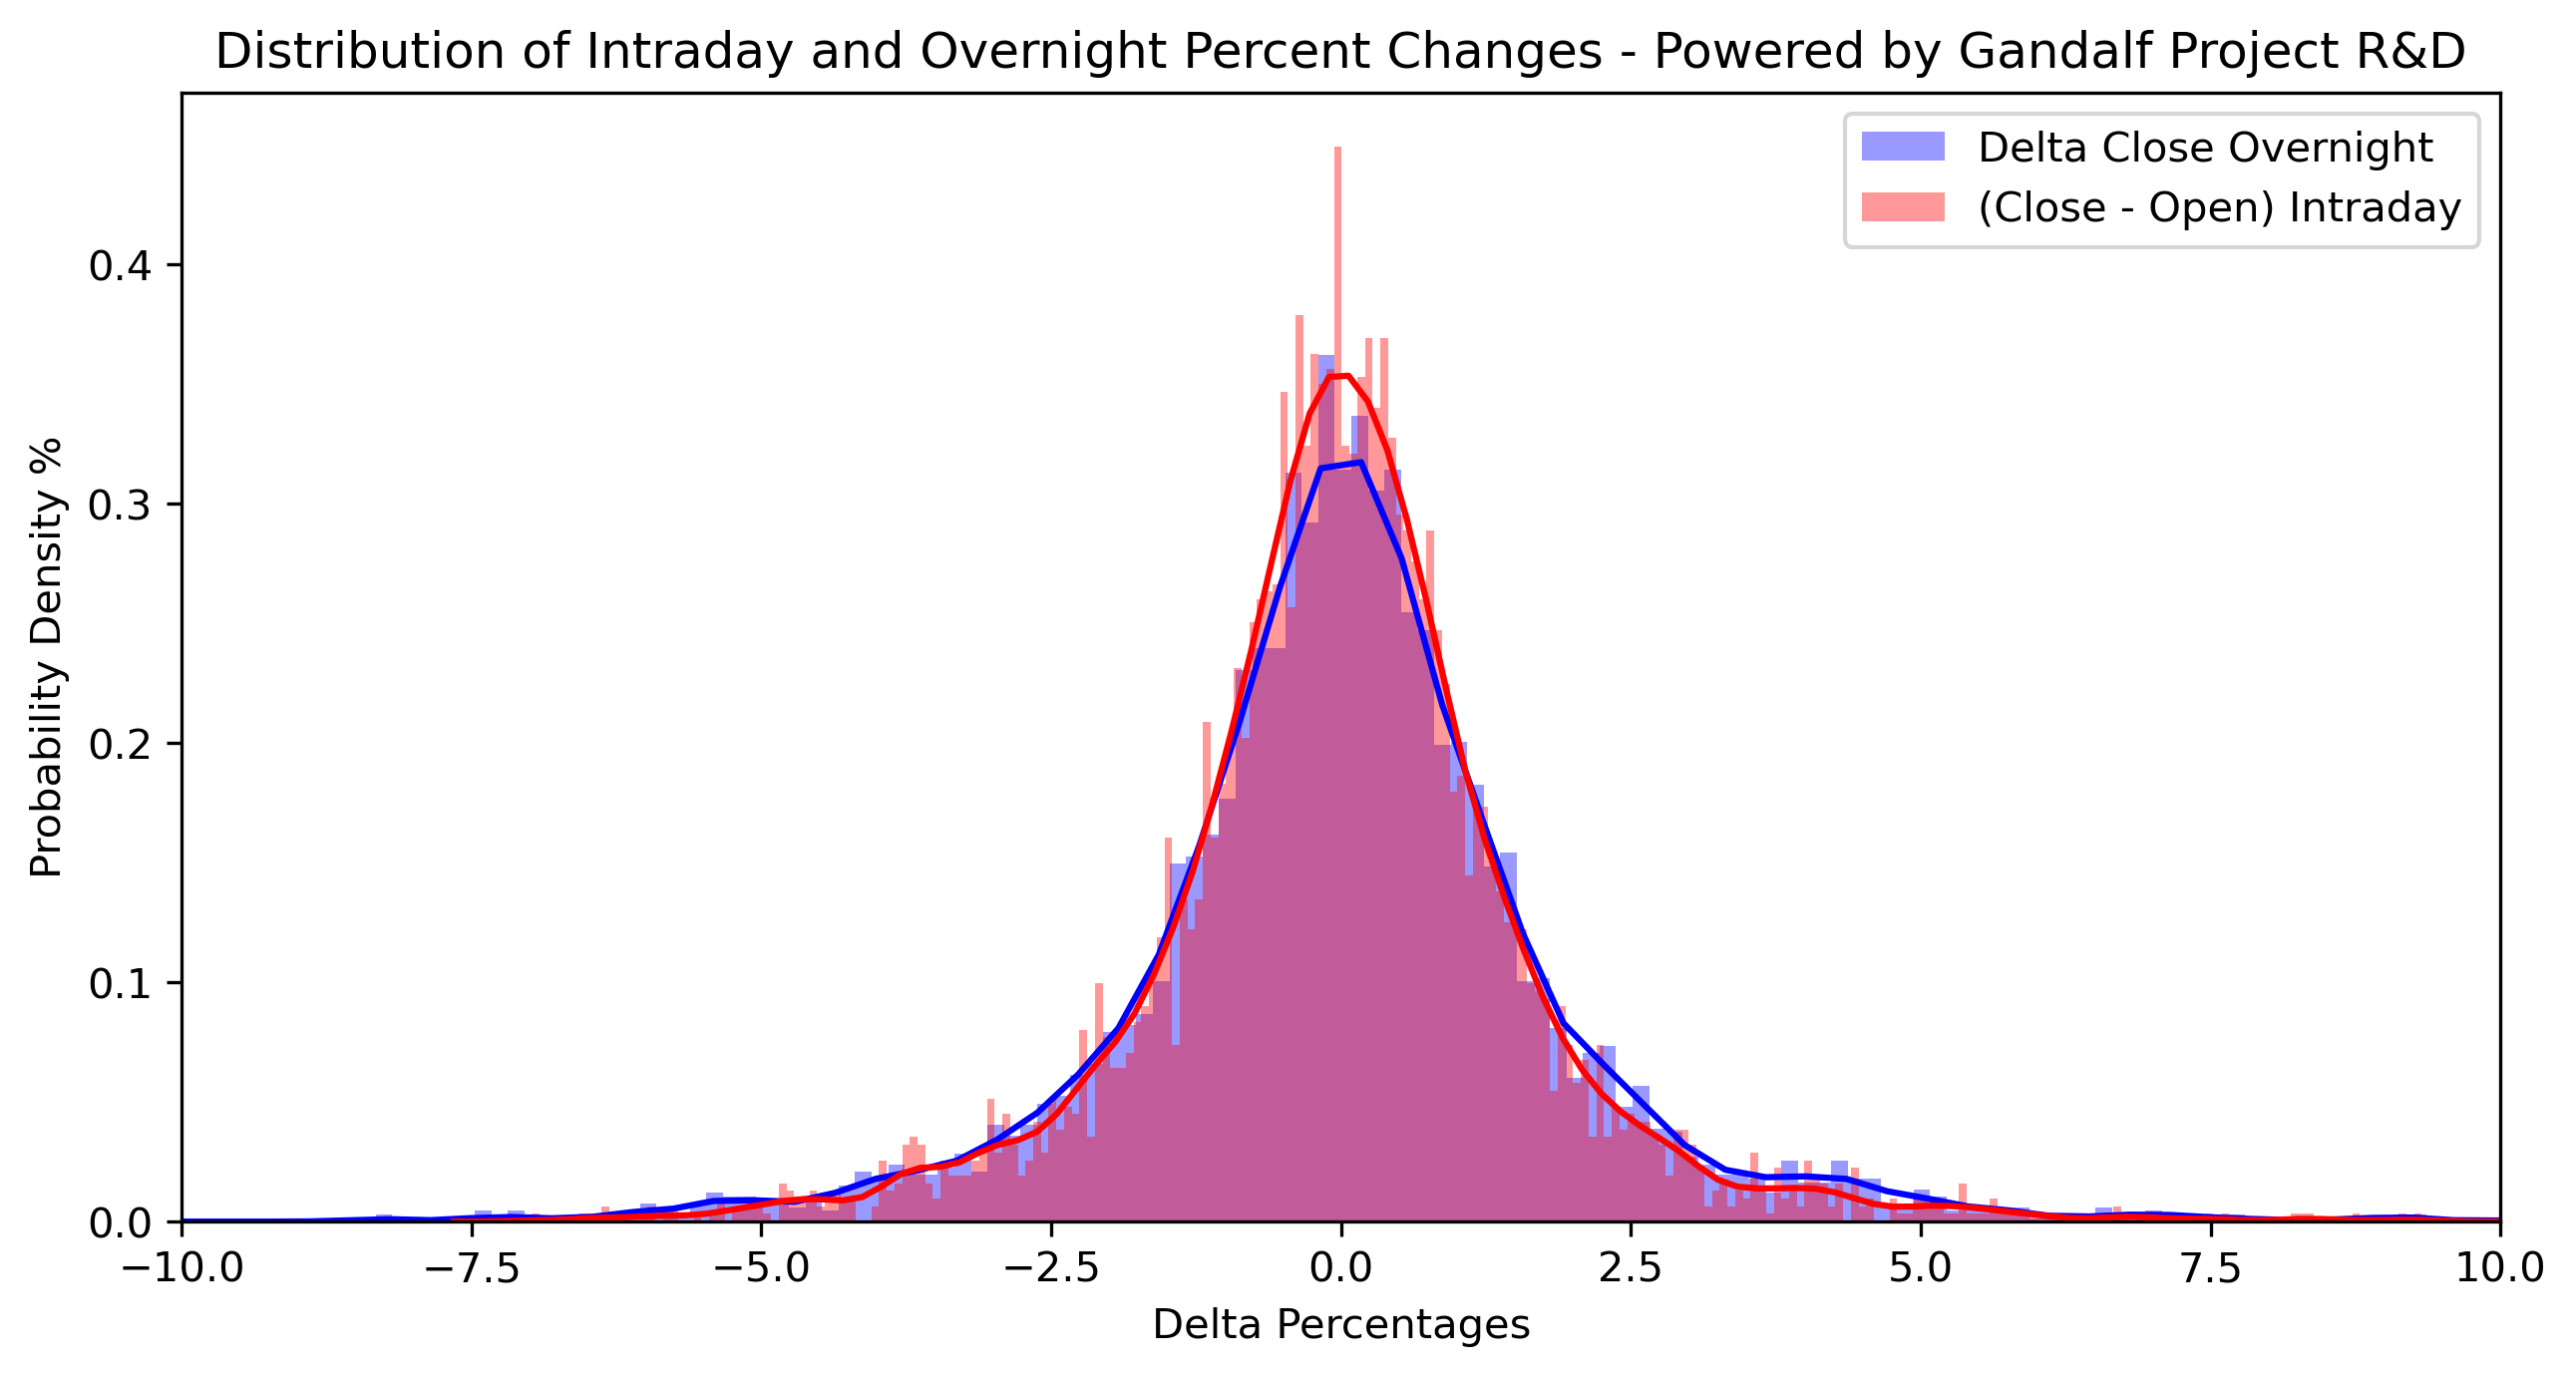

In [6]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(instrument['DeltaClosePerc'].dropna(), bins=300, color='b', label='Delta Close Overnight')
sns.distplot(instrument['OpenClosePerc'].dropna(), bins=300, color='r', label='(Close - Open) Intraday')
plt.xlim(xmin=-10, xmax = 10)
plt.title("Distribution of Intraday and Overnight Percent Changes - Powered by Gandalf Project R&D")
plt.xlabel("Delta Percentages")
plt.ylabel("Probability Density %")
plt.legend()
plt.show()

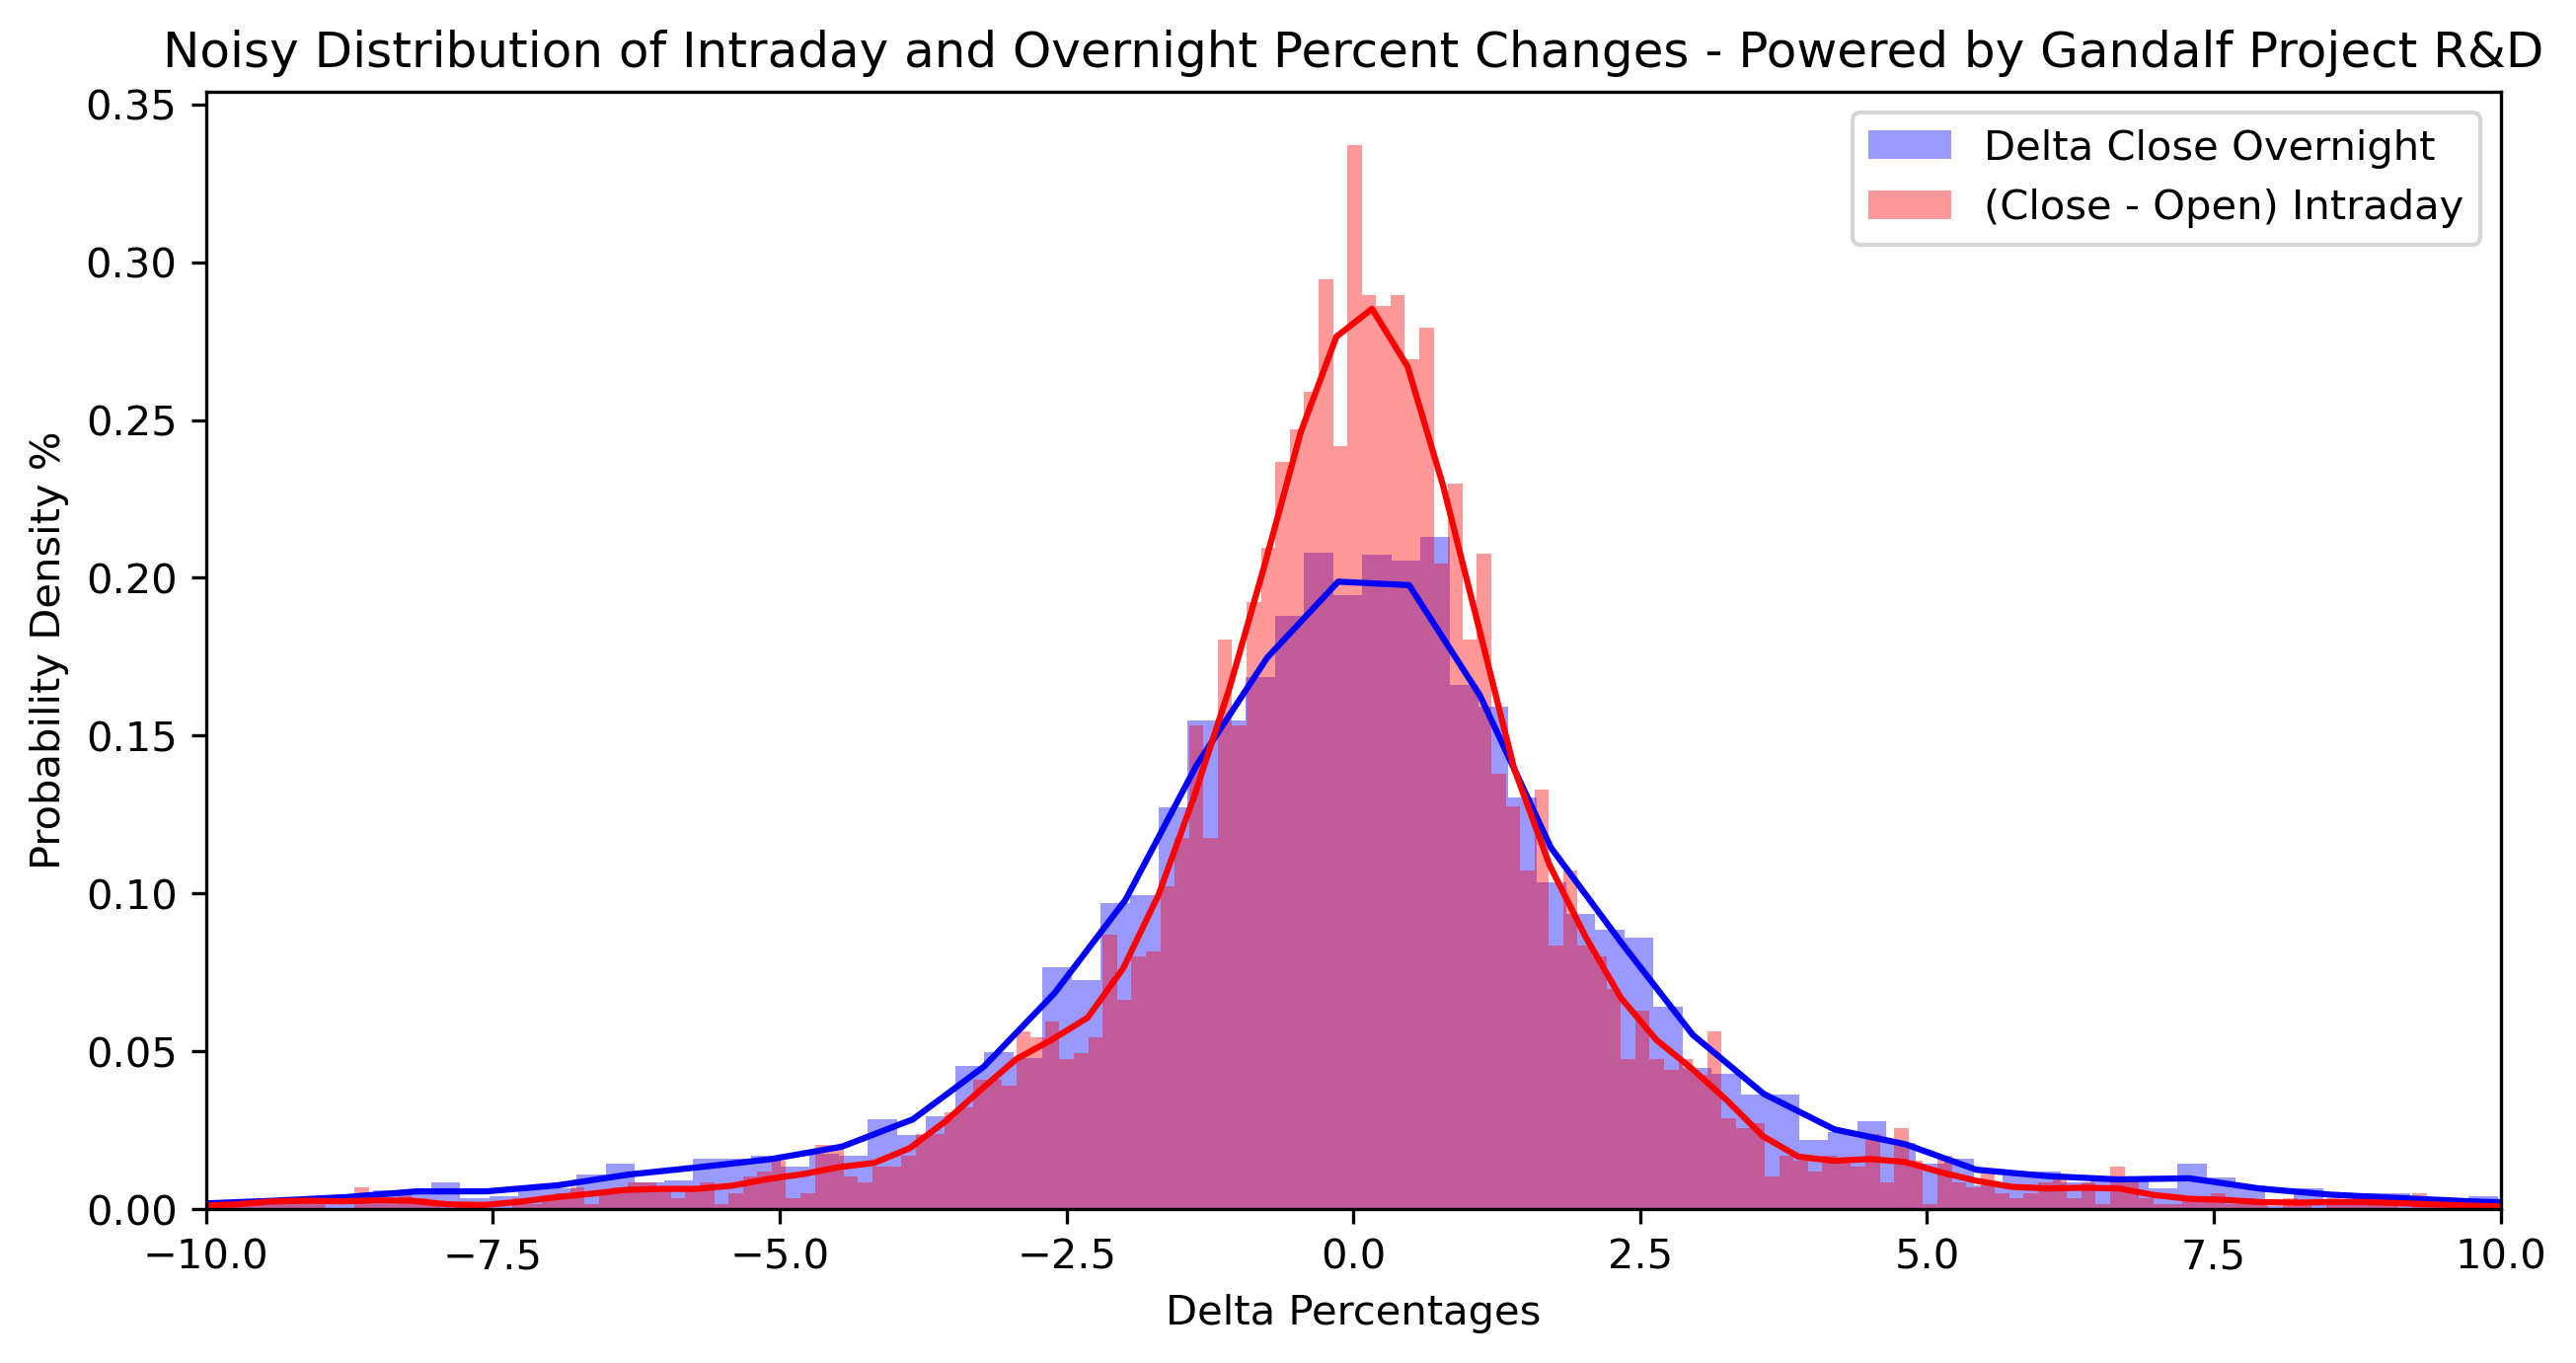

In [7]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(instrument['Noisy_DeltaClosePerc'].dropna(), bins=300, color='b', label='Delta Close Overnight')
sns.distplot(instrument['Noisy_OpenClosePerc'].dropna(), bins=300, color='r', label='(Close - Open) Intraday')
plt.xlim(xmin=-10, xmax = 10)
plt.title("Noisy Distribution of Intraday and Overnight Percent Changes - Powered by Gandalf Project R&D")
plt.xlabel("Delta Percentages")
plt.ylabel("Probability Density %")
plt.legend()
plt.show()

Grafichiamo le due serie sullo stesso grafico:

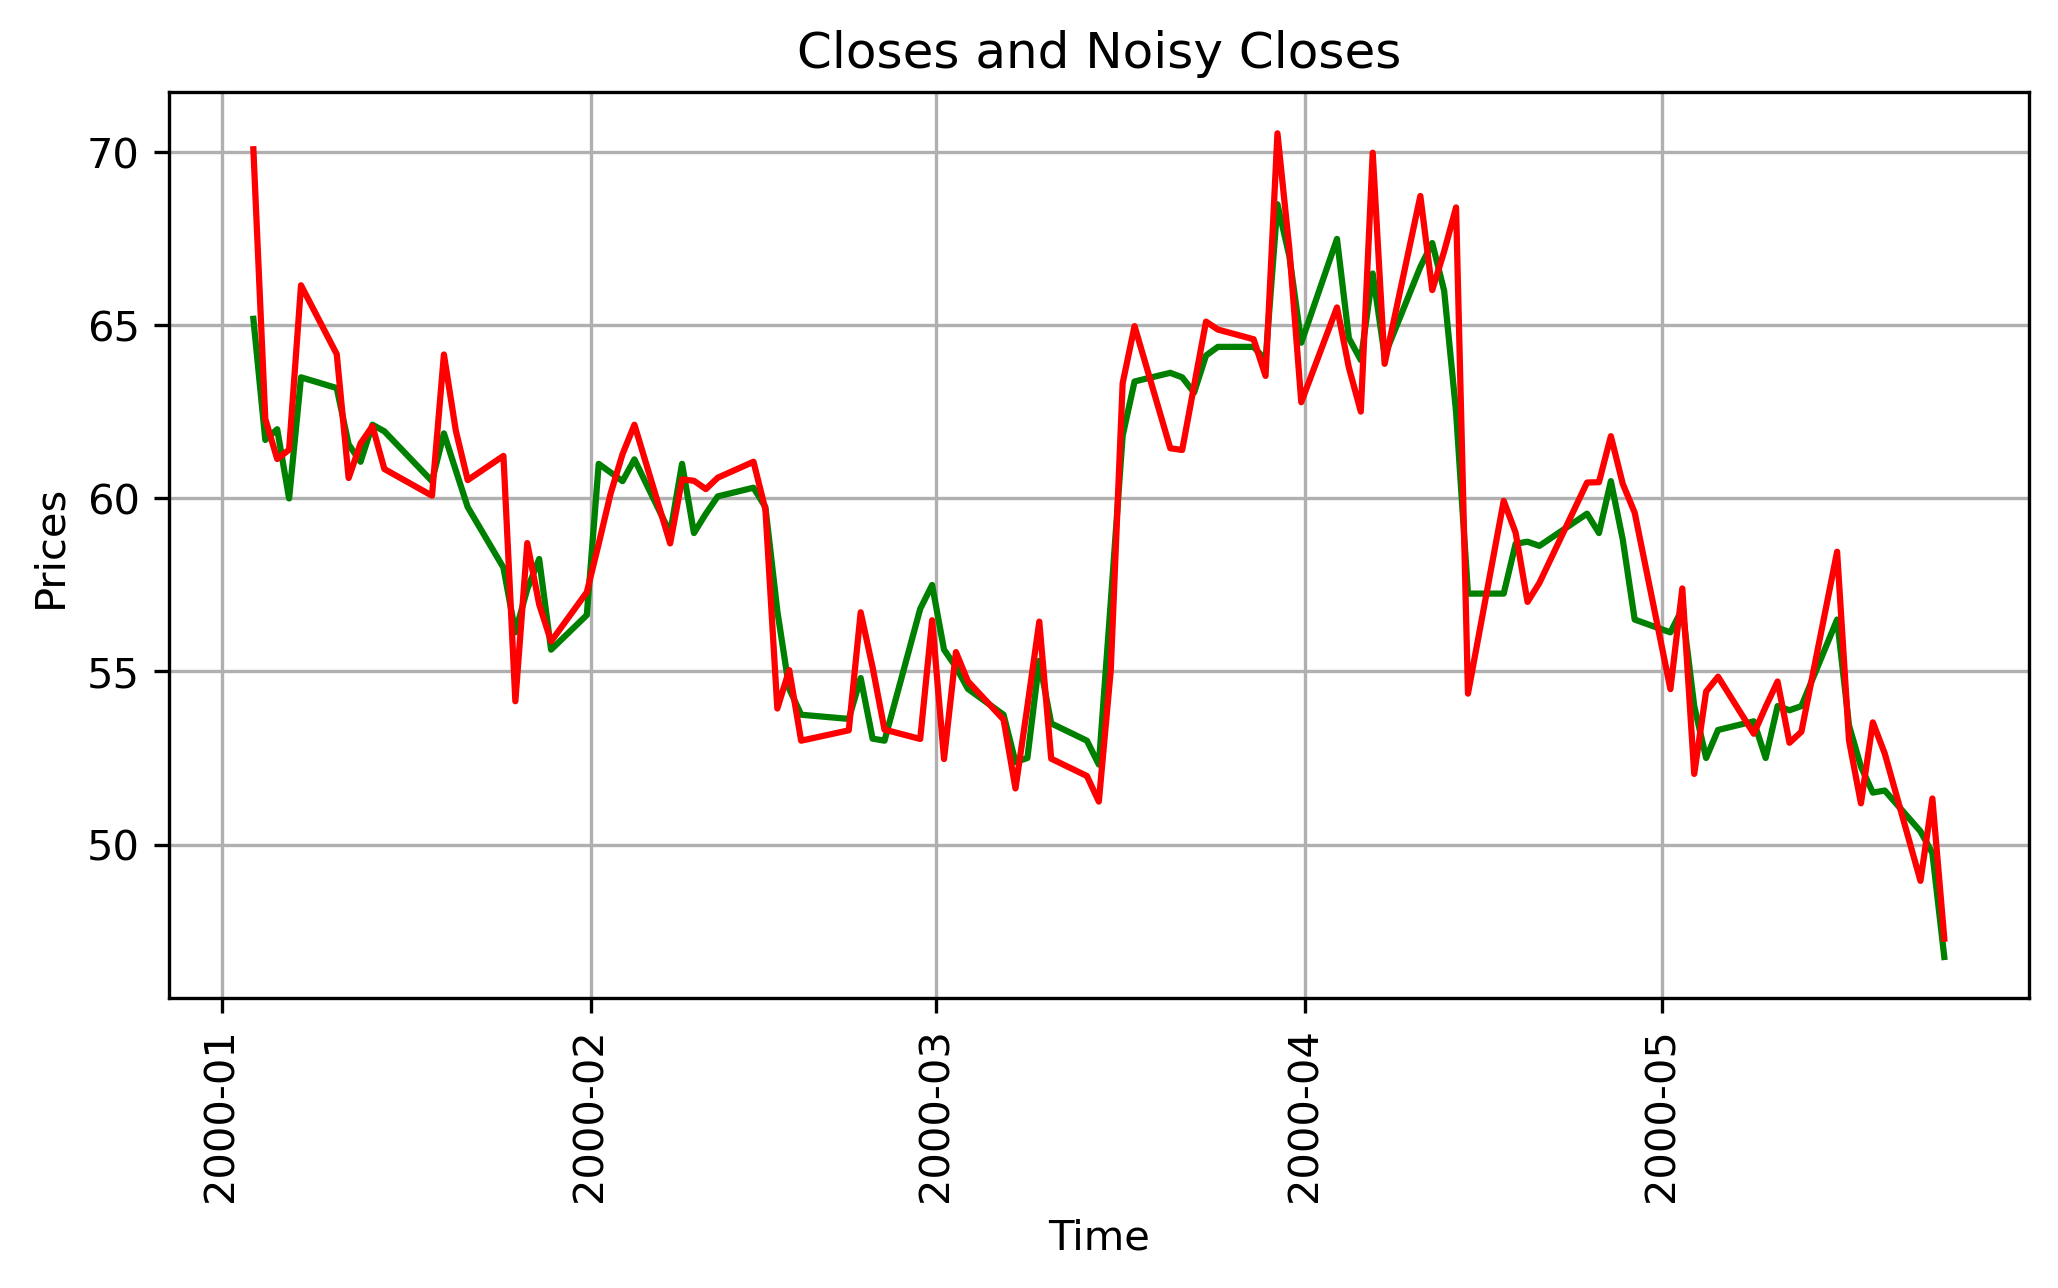

In [8]:
plt.figure(figsize=(8,4), dpi=300)

plt.plot(instrument['Close'][:100], color='green')
plt.plot(instrument['Noisy_Close'][:100], color='red')
plt.xlabel("Time")
plt.ylabel("Prices")
plt.title('Closes and Noisy Closes')
plt.xticks(rotation='vertical')
plt.grid(True)
#plt.legend()
plt.show()

### Ripetiamo il processo per Open, High, Low, Close:

In [9]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def single_noise_adder(array, single_range, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_array = np.zeros(len(array))
    i = 0
    while i < len(array):
        factor = np.random.uniform(-1, 1)
        new_array[i] = round(float(array[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range[i])), 2)
        i += 1
    return new_array
    
# INPUTS **********************************************************************************************************

noisePercent = 20

filename = "HD_Daily.txt"

startDate = "20000101"
endDate = "20180810"

# INPUTS **********************************************************************************************************

startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Vol'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['Range'] = round(instrument['High'] - instrument['Low'],2)
instrument['Body'] = abs(instrument['Open'] - instrument['Close'])
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(10)

Il file contiene 4682 record


,Open,High,Low,Close,Vol,AvgPrice,Range,Body,OpenClose,OpenClosePerc,DeltaClosePerc
Date_Time,,,,,,,,,,,
2000-01-03 16:00:00,68.63,69.19,63.81,65.19,12030600,66.70,5.38,3.44,-3.44,-5.01,NaN
2000-01-04 16:00:00,64.00,64.31,61.19,61.69,8722000,62.80,3.12,2.31,-2.31,-3.61,-5.37
2000-01-05 16:00:00,61.75,63.00,61.00,62.00,6939800,61.94,2.00,0.25,0.25,0.40,0.50
2000-01-06 16:00:00,61.63,62.00,60.00,60.00,6607600,60.91,2.00,1.63,-1.63,-2.64,-3.23
2000-01-07 16:00:00,61.75,63.50,60.75,63.50,6207300,62.38,2.75,1.75,1.75,2.83,5.83
2000-01-10 16:00:00,62.00,63.56,62.00,63.19,5455400,62.69,1.56,1.19,1.19,1.92,-0.49
2000-01-11 16:00:00,63.44,63.63,61.25,61.56,4371600,62.47,2.38,1.88,-1.88,-2.96,-2.58
2000-01-12 16:00:00,61.56,62.06,60.69,61.06,4629400,61.34,1.37,0.50,-0.50,-0.81,-0.81
2000-01-13 16:00:00,62.13,62.50,61.50,62.13,4538900,62.06,1.00,0.00,0.00,0.00,1.75


Creiamo una funzione che generi rumore sulle quattro serie Open High Low Close:

In [10]:
def ohlc_noise_adder(O, H, L, C, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_O = np.zeros(len(O))
    new_H = np.zeros(len(H))
    new_L = np.zeros(len(L))
    new_C = np.zeros(len(C))
    i = 0
    while i < len(O):
        factor = np.random.uniform(-1, 1)
        single_range = H[i] - L[i]
        new_O[i] = round(float(O[i]) + factor * (float(percentage_noise_addiction) / 100) 
                         * abs(float(single_range)), 2)
        new_H[i] = round(float(H[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        new_L[i] = round(float(L[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        new_C[i] = round(float(C[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        #print(new_O[i],new_H[i],new_L[i],new_C[i])
        app = [new_O[i],new_H[i],new_L[i],new_C[i]]
        app.sort()
        #print(app)
        new_O[i] = new_O[i]
        new_H[i] = app[-1]
        new_L[i] = app[0]
        new_C[i] = new_C[i]
        #print("new:",new_O[i],new_H[i],new_L[i],new_C[i])
        i += 1
    return new_O, new_H, new_L, new_C

stream = ohlc_noise_adder(instrument['Open'],
                                  instrument['High'],
                                  instrument['Low'],
                                  instrument['Close'],
                                  50)

new_instrument = instrument.copy()
new_instrument = new_instrument.drop(new_instrument.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis=1)
new_instrument['Noisy_Open'] = stream[0]
new_instrument['Noisy_High'] = stream[1]
new_instrument['Noisy_Low'] = stream[2]
new_instrument['Noisy_Close'] = stream[3]
new_instrument['Volume'] = instrument['Vol']
new_instrument['Noisy_OpenClosePerc'] = round((new_instrument['Noisy_Close'] - new_instrument['Noisy_Open']) / new_instrument['Noisy_Open'] * 100,2)
new_instrument['Noisy_DeltaClosePerc'] = round((new_instrument['Noisy_Close'] - new_instrument['Noisy_Close'].shift(1)) / new_instrument['Noisy_Close'].shift(1) * 100,2)

new_instrument.head()

,Noisy_Open,Noisy_High,Noisy_Low,Noisy_Close,Volume,Noisy_OpenClosePerc,Noisy_DeltaClosePerc
Date_Time,,,,,,,
2000-01-03 16:00:00,70.20,70.76,65.38,66.76,12030600,-4.90,NaN
2000-01-04 16:00:00,65.41,65.72,62.60,63.10,8722000,-3.53,-5.48
2000-01-05 16:00:00,60.87,62.12,60.12,61.12,6939800,0.41,-3.14
2000-01-06 16:00:00,61.48,61.85,59.85,59.85,6607600,-2.65,-2.08
2000-01-07 16:00:00,62.32,64.07,61.32,64.07,6207300,2.81,7.05


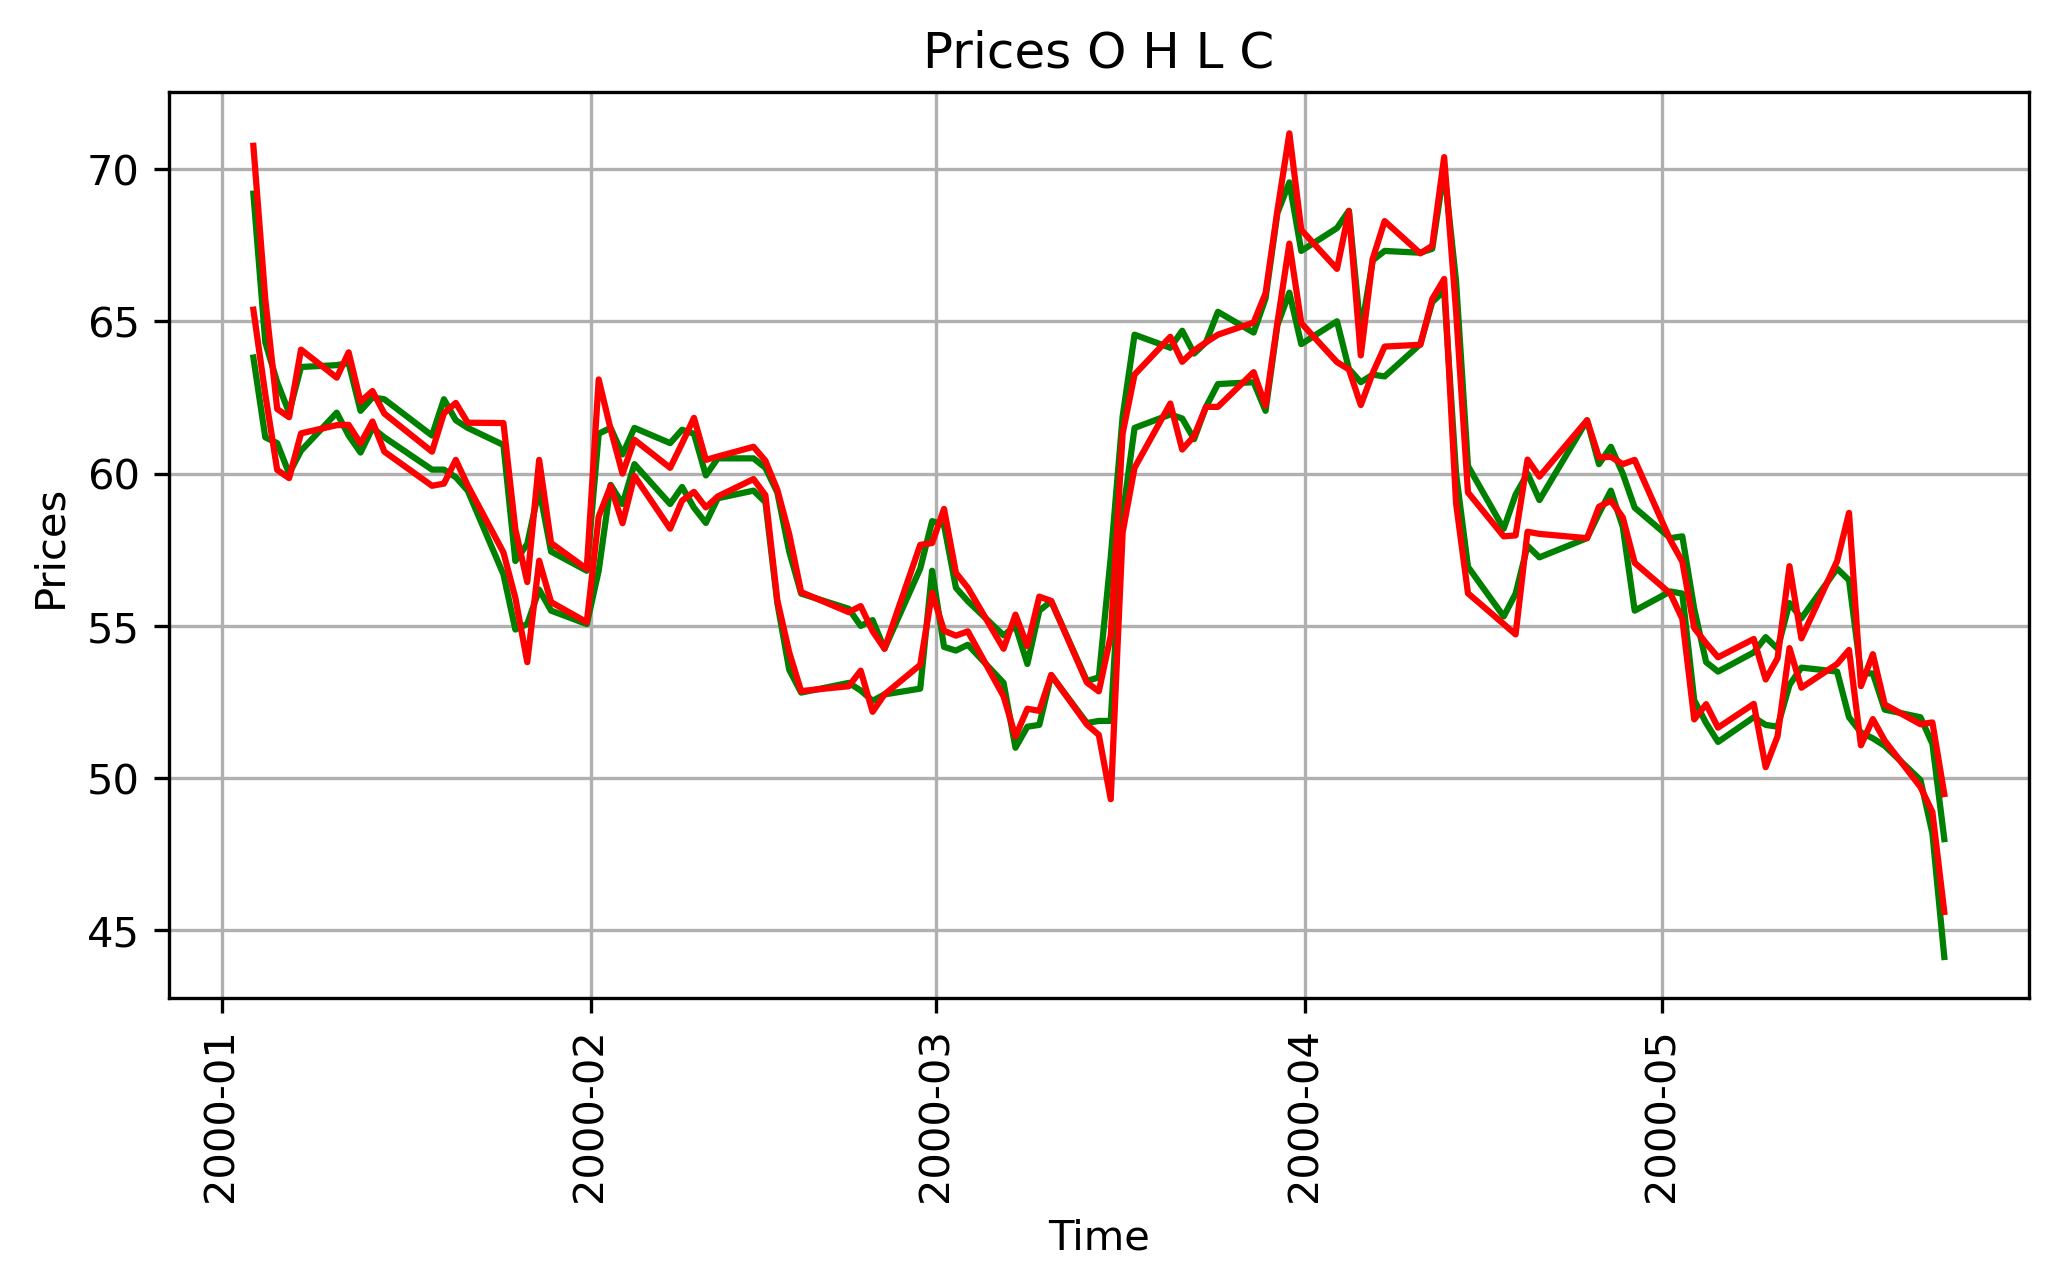

In [11]:
plt.figure(figsize=(8,4), dpi=300)

#plt.plot(instrument['Open'][:100], color='green')
plt.plot(instrument['High'][:100], color='green')
plt.plot(instrument['Low'][:100], color='green')
#plt.plot(instrument['Close'][:100], color='green')

#plt.plot(new_instrument['Noisy_Open'][:100], color='red')
plt.plot(new_instrument['Noisy_High'][:100], color='red')
plt.plot(new_instrument['Noisy_Low'][:100], color='red')
#plt.plot(new_instrument['Noisy_Close'][:100], color='red')

plt.xlabel("Time")
plt.ylabel("Prices")
plt.title('Prices O H L C')
plt.xticks(rotation='vertical')
plt.grid(True)
#plt.legend()
plt.show()

Abbiamo così ottenuto una seconda serie "rumorosa" su cui testare successivamente i nostri modelli!

### Esportiamo la serie così ottenuta in un file .csv da poter utilizzare:

In [12]:
new_filename = 'NoiseAddictedSerie.csv'
new_instrument.to_csv(new_filename,index=True)

# Unendo i blocchi: CODICE COMPLETO #1

Il file contiene 4682 record
                      Open   High    Low  Close       Vol
Date_Time                                                
2000-01-03 16:00:00  68.63  69.19  63.81  65.19  12030600
2000-01-04 16:00:00  64.00  64.31  61.19  61.69   8722000
2000-01-05 16:00:00  61.75  63.00  61.00  62.00   6939800
2000-01-06 16:00:00  61.63  62.00  60.00  60.00   6607600
2000-01-07 16:00:00  61.75  63.50  60.75  63.50   6207300
2000-01-10 16:00:00  62.00  63.56  62.00  63.19   5455400
2000-01-11 16:00:00  63.44  63.63  61.25  61.56   4371600
2000-01-12 16:00:00  61.56  62.06  60.69  61.06   4629400
2000-01-13 16:00:00  62.13  62.50  61.50  62.13   4538900
2000-01-14 16:00:00  62.38  62.44  61.19  61.94   4578000

                 count          mean           std     min           1%  \
Open            4681.0  6.262071e+01  4.408440e+01   17.74       20.994   
High            4681.0  6.322779e+01  4.432258e+01   18.60       21.480   
Low             4681.0  6.200205e+01  4.383873e+0

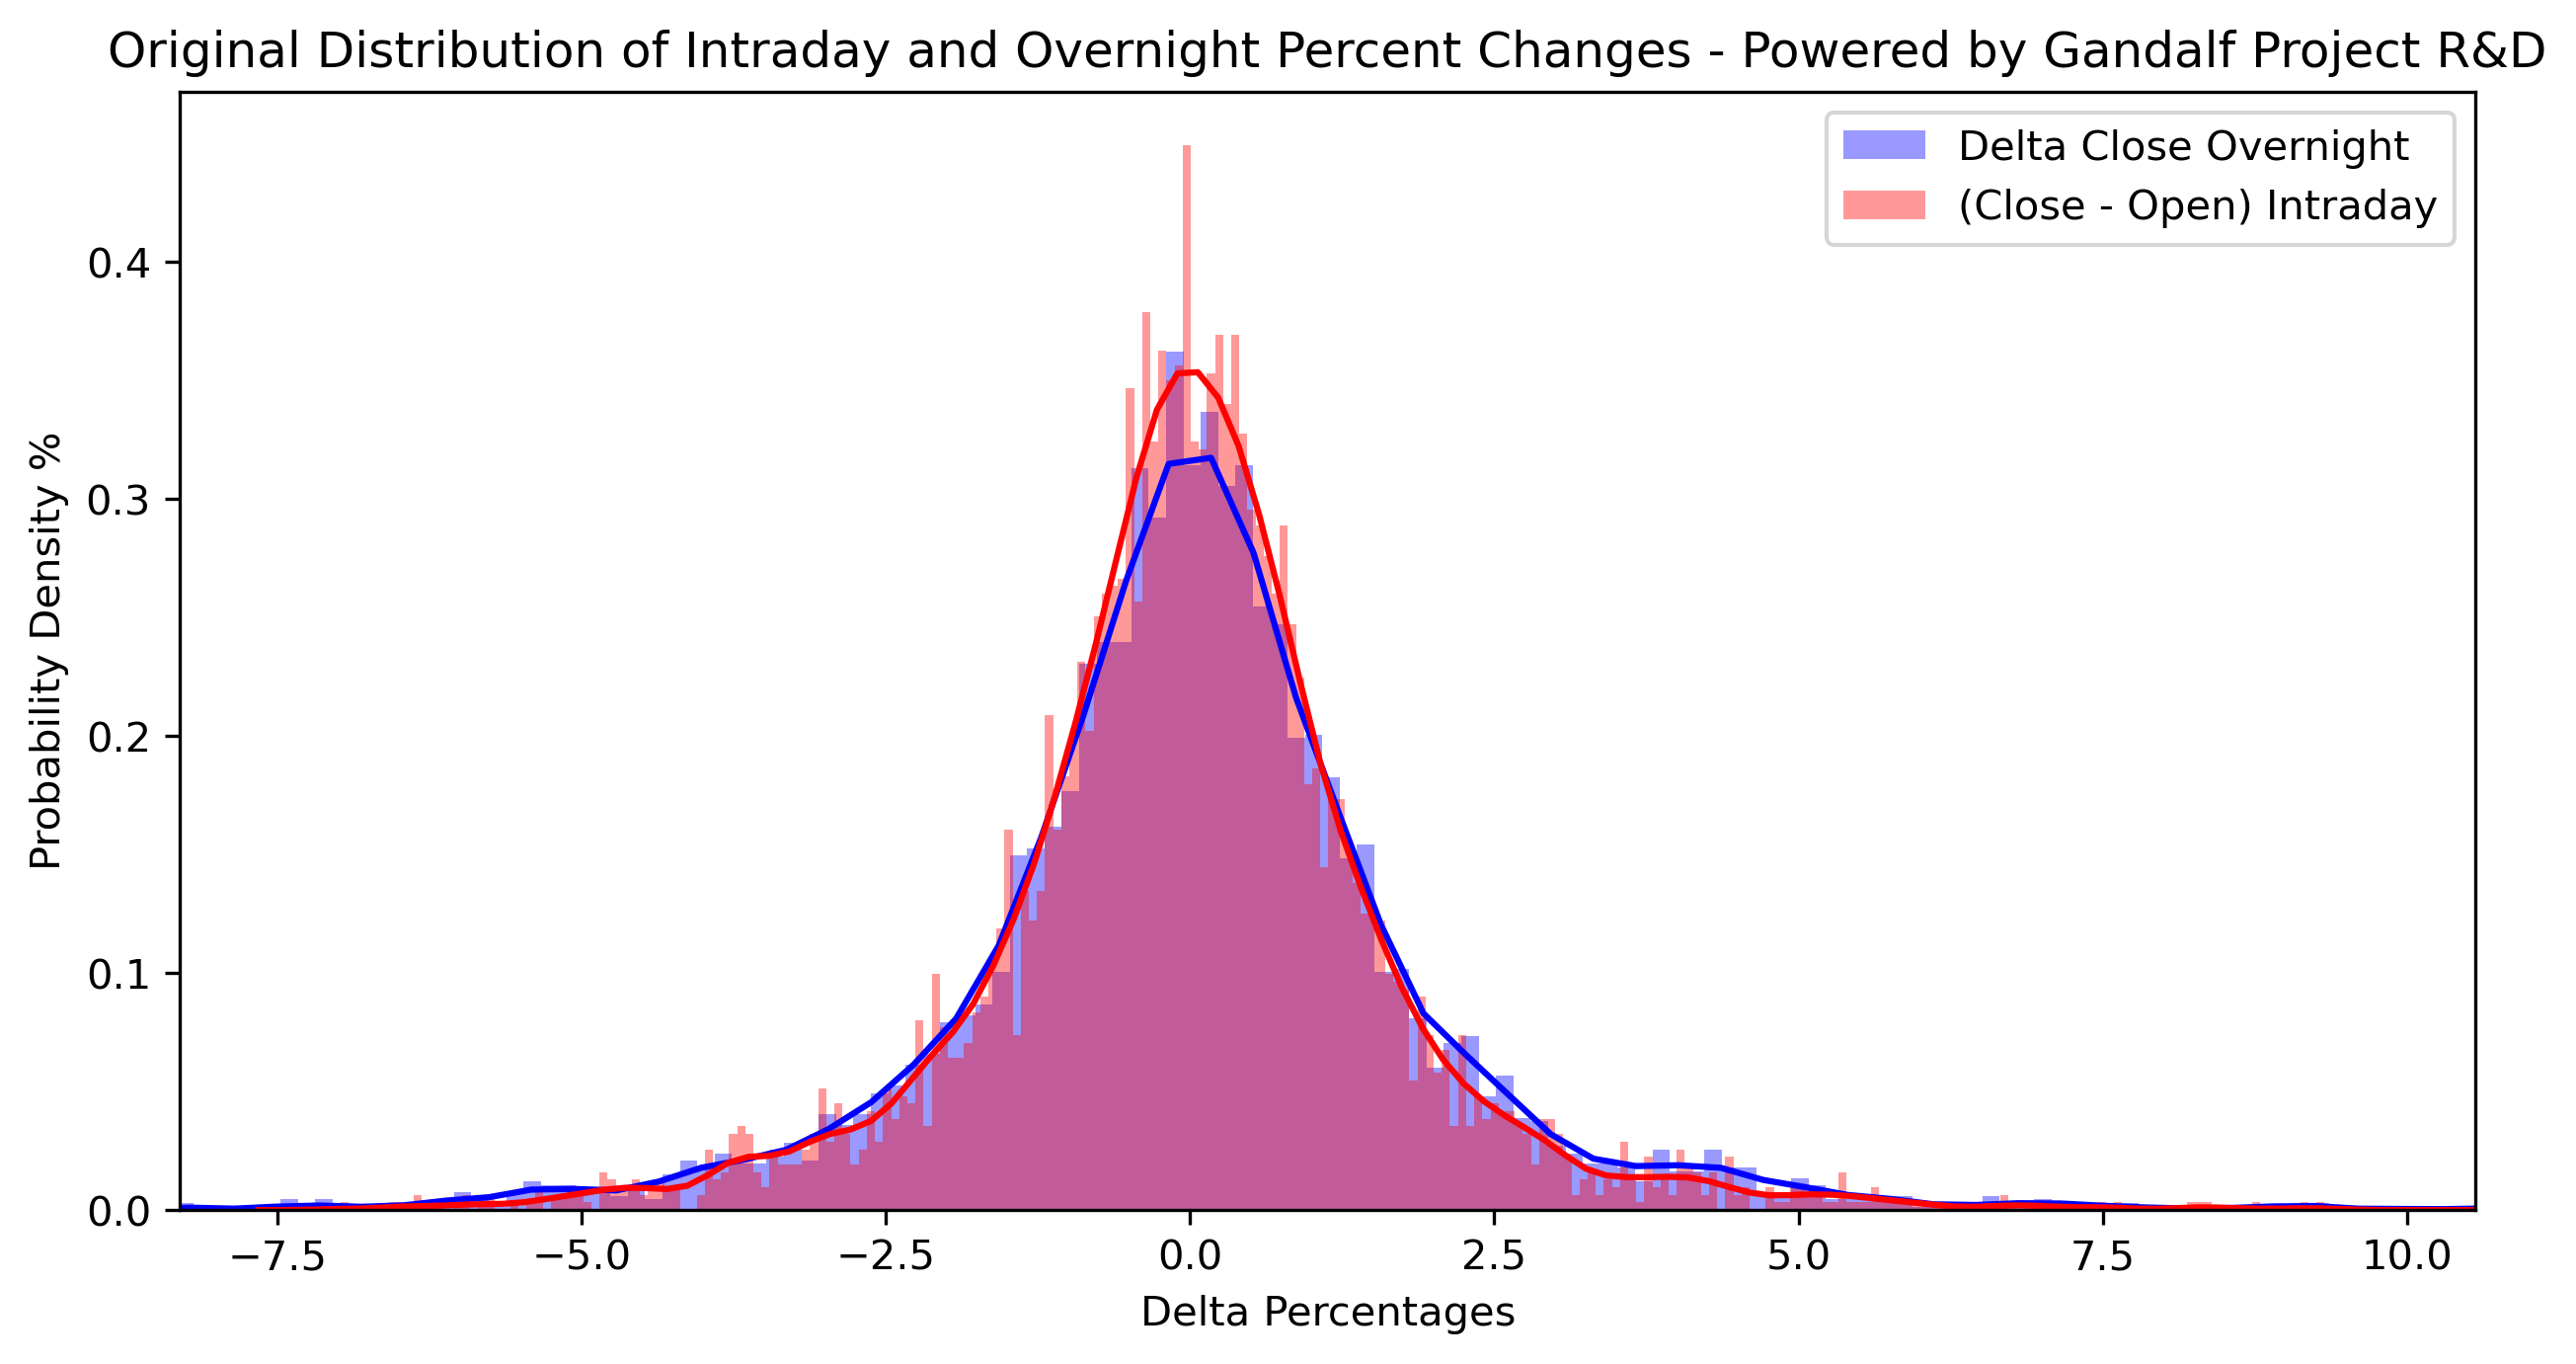

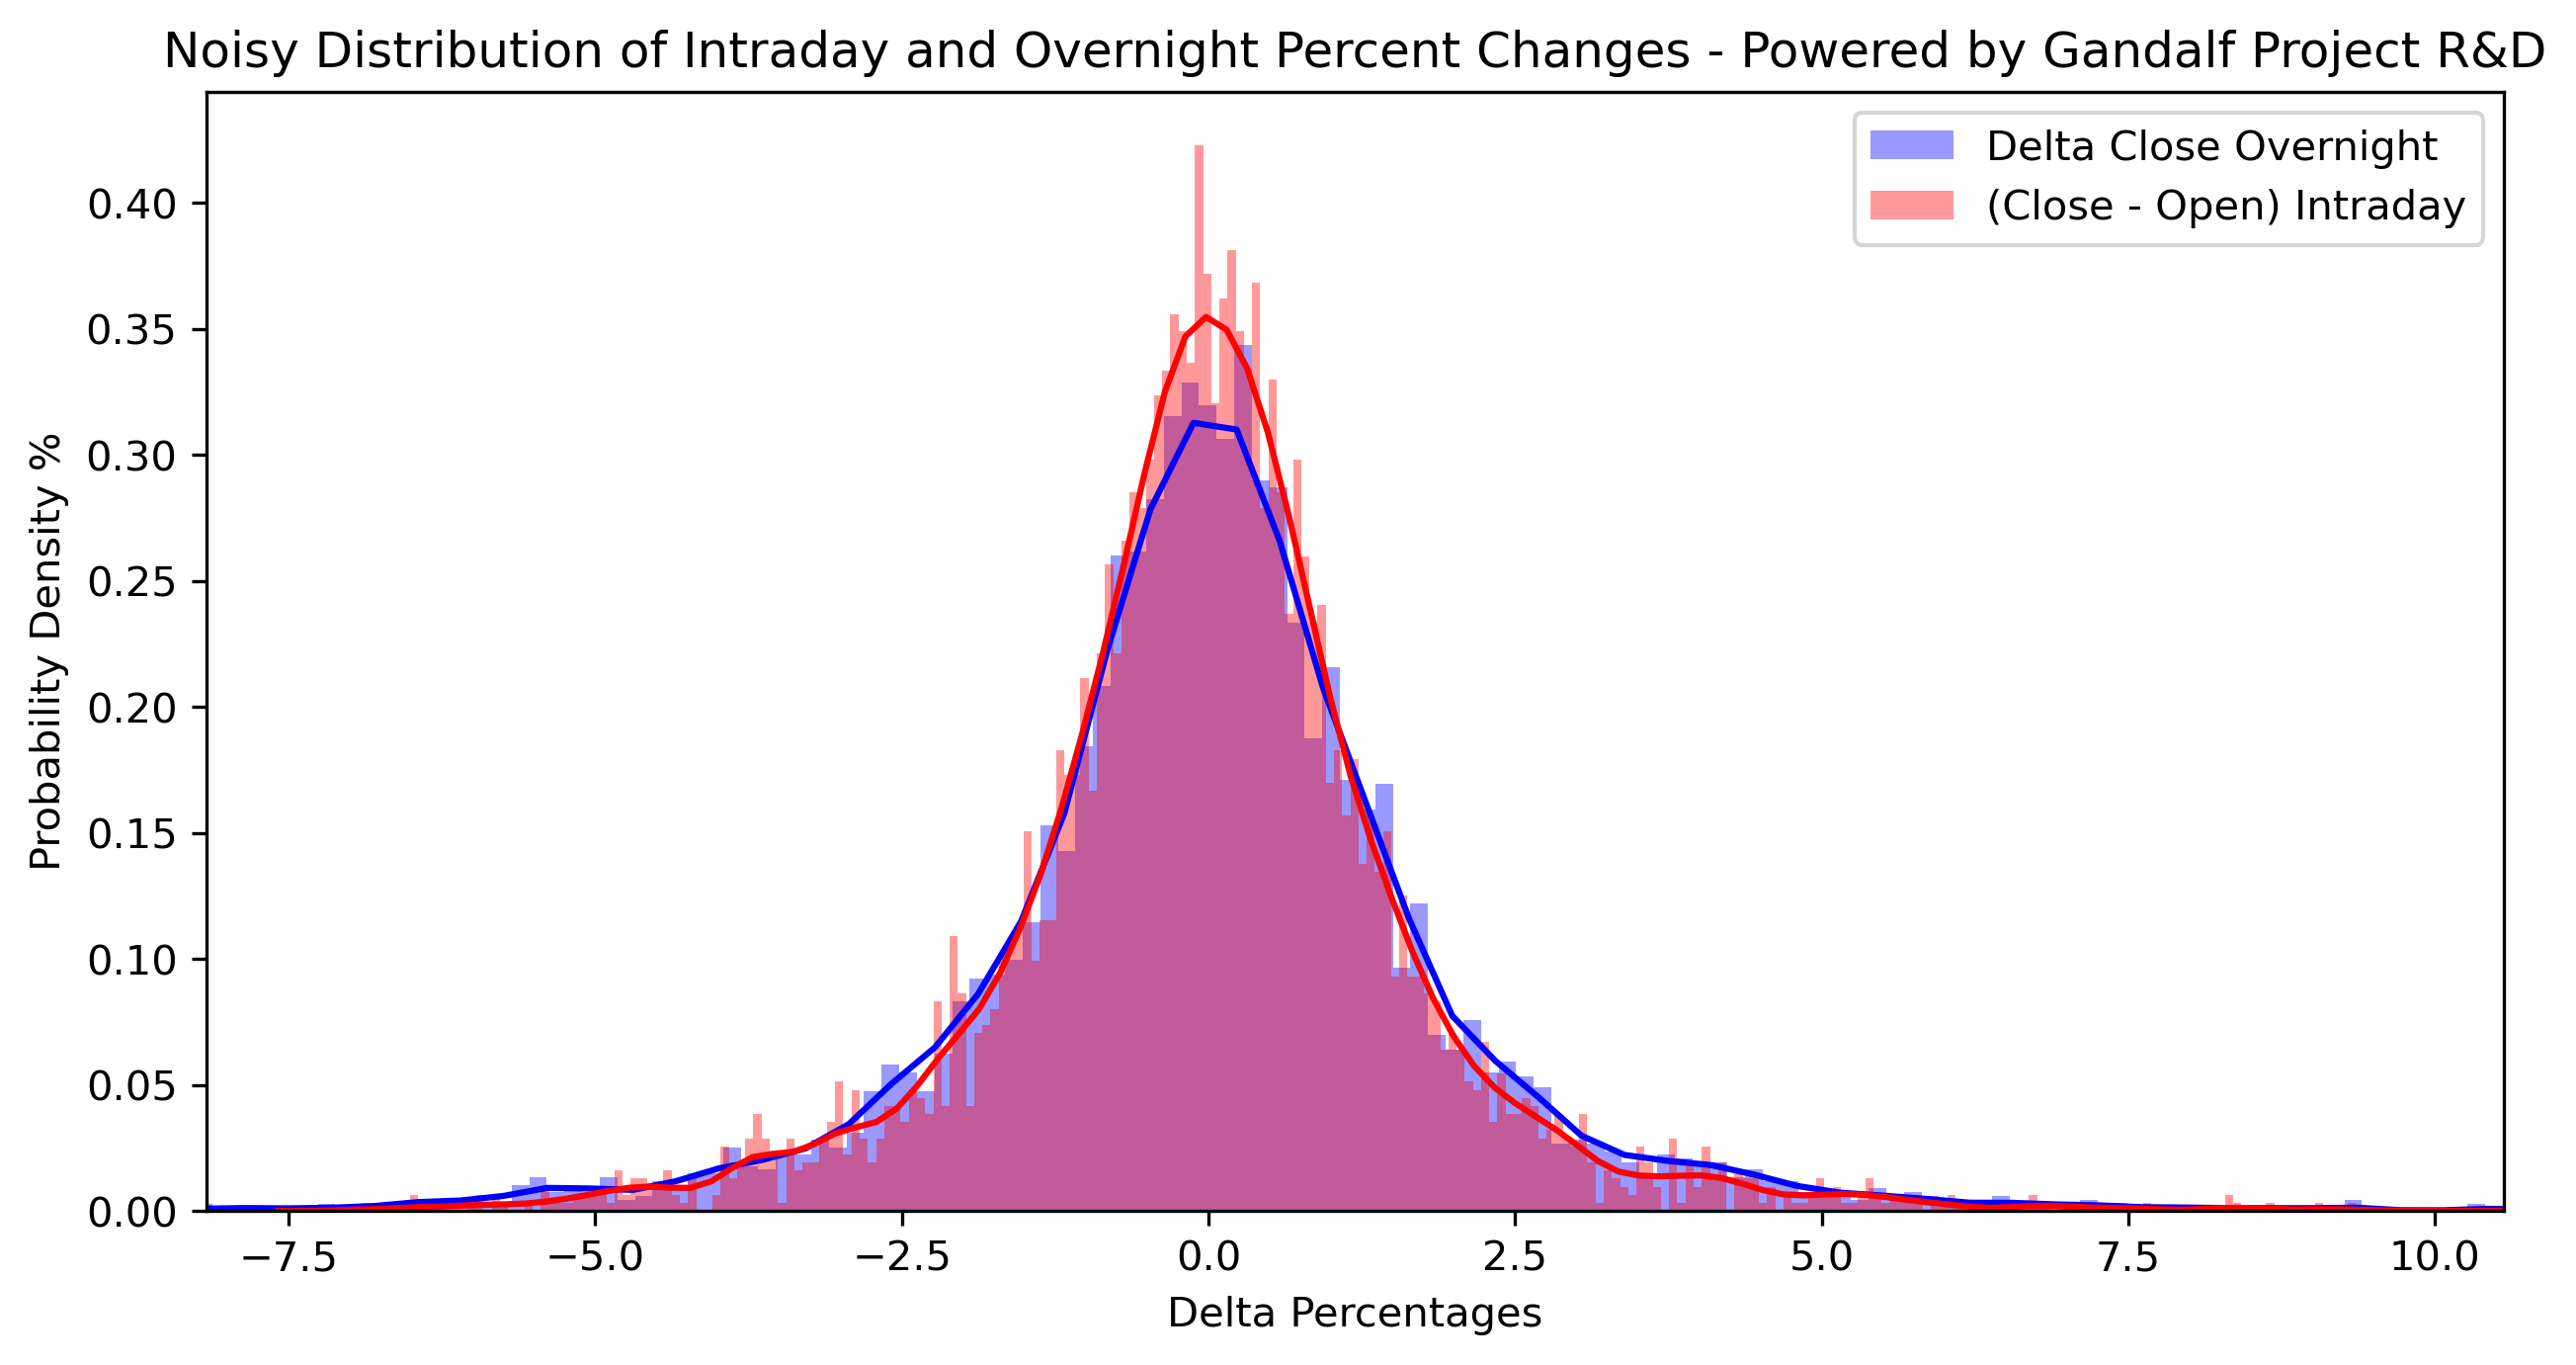

No handles with labels found to put in legend.


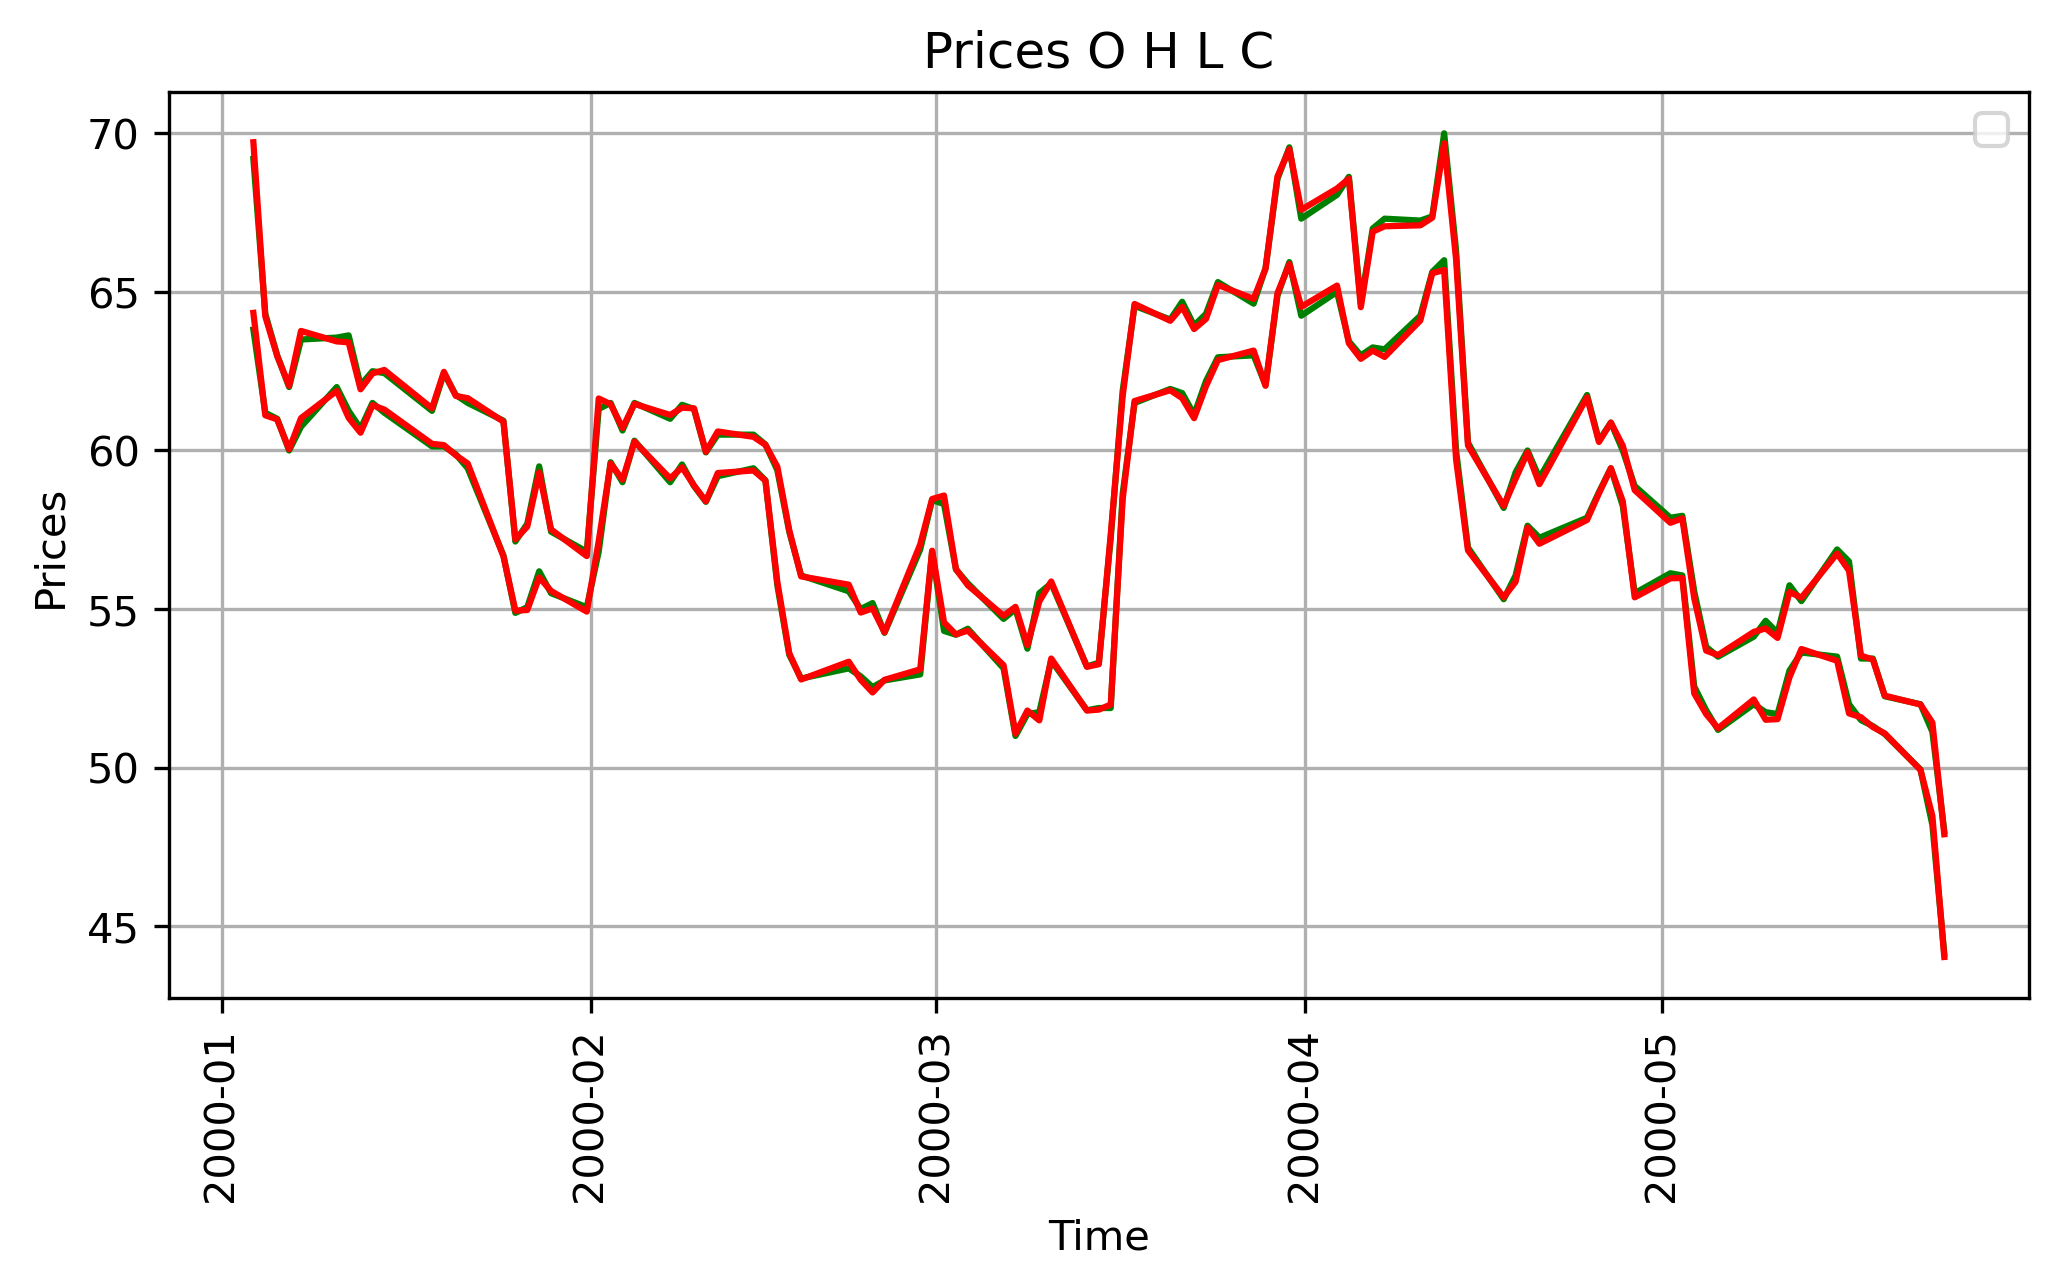

In [13]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def single_noise_adder(array, single_range, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_array = np.zeros(len(array))
    i = 0
    while i < len(array):
        factor = np.random.uniform(-1, 1)
        new_array[i] = round(float(array[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range[i])), 2)
        i += 1
    return new_array

def ohlc_noise_adder(O, H, L, C, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_O = np.zeros(len(O))
    new_H = np.zeros(len(H))
    new_L = np.zeros(len(L))
    new_C = np.zeros(len(C))
    i = 0
    while i < len(O):
        factor = np.random.uniform(-1, 1)
        single_range = H[i] - L[i]
        new_O[i] = round(float(O[i]) + factor * (float(percentage_noise_addiction) / 100) 
                         * abs(float(single_range)), 2)
        new_H[i] = round(float(H[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        new_L[i] = round(float(L[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        new_C[i] = round(float(C[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        #print(new_O[i],new_H[i],new_L[i],new_C[i])
        app = [new_O[i],new_H[i],new_L[i],new_C[i]]
        app.sort()
        #print(app)
        new_O[i] = new_O[i]
        new_H[i] = app[-1]
        new_L[i] = app[0]
        new_C[i] = new_C[i]
        #print("new:",new_O[i],new_H[i],new_L[i],new_C[i])
        i += 1
    return new_O, new_H, new_L, new_C
    
# INPUTS **********************************************************************************************************

noisePercent = 10

filename = "HD_Daily.txt"

startDate = "20000101"
endDate = "20180810"

new_filename = "NoiseAddictedSerie.csv"

# INPUTS **********************************************************************************************************

startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Vol'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['Range'] = round(instrument['High'] - instrument['Low'],2)
instrument['Body'] = abs(instrument['Open'] - instrument['Close'])
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)

instrument = instrument.loc[startDateParsed:endDateParsed]
print(instrument[['Open','High','Low','Close','Vol']].head(10))

print("")
print(instrument.describe(percentiles = [0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).transpose())

stream = ohlc_noise_adder(instrument['Open'],
                                  instrument['High'],
                                  instrument['Low'],
                                  instrument['Close'],
                                  noisePercent)

new_instrument = instrument.copy()
new_instrument = new_instrument.drop(new_instrument.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis=1)
new_instrument['Noisy_Open'] = stream[0]
new_instrument['Noisy_High'] = stream[1]
new_instrument['Noisy_Low'] = stream[2]
new_instrument['Noisy_Close'] = stream[3]
new_instrument['Volume'] = instrument['Vol']
new_instrument['Noisy_OpenClosePerc'] = round((new_instrument['Noisy_Close'] - new_instrument['Noisy_Open']) 
                                              / new_instrument['Noisy_Open'] * 100,2)
new_instrument['Noisy_DeltaClosePerc'] = round((new_instrument['Noisy_Close'] - new_instrument['Noisy_Close'].shift(1)) 
                                               / new_instrument['Noisy_Close'].shift(1) * 100,2)

print("")
print(new_instrument[['Noisy_Open','Noisy_High','Noisy_Low','Noisy_Close','Volume']].head(10))

print("")
print(new_instrument.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).transpose())

new_instrument.to_csv(new_filename,index=True)

print("")
print('Serie addizionata di rumore (+/-',noisePercent,'% max del range di barra).')
print('File',new_filename,'esportato!')

# MODULO GRAFICO **************************************************************************************************

# codice per limitare automaticamente il grafico della distribuzione
a = np.array(instrument['DeltaClosePerc'].dropna(0))
b = np.array(instrument['OpenClosePerc'].dropna(0))
p1 = np.percentile(a, 99.9)
p2 = np.percentile(b, 99.9)
m1 = np.percentile(a, 0.1)
m2 = np.percentile(b, 0.1)
maxsns = max(p1,p2)
minsns = min(m1,m2)
#print(p1,p2)
#print(m1,m2)
#print(maxsns,minsns)

plt.figure(figsize=(10,5),dpi=300)
sns.distplot(instrument['DeltaClosePerc'].dropna(), bins=300, color='b', label='Delta Close Overnight')
sns.distplot(instrument['OpenClosePerc'].dropna(), bins=300, color='r', label='(Close - Open) Intraday')
plt.xlim(xmin = minsns, xmax = maxsns)
plt.title("Original Distribution of Intraday and Overnight Percent Changes - Powered by Gandalf Project R&D")
plt.xlabel("Delta Percentages")
plt.ylabel("Probability Density %")
plt.legend()
plt.show()

# codice per limitare automaticamente il grafico della distribuzione
a = np.array(new_instrument['Noisy_DeltaClosePerc'].dropna(0))
b = np.array(new_instrument['Noisy_OpenClosePerc'].dropna(0))
np1 = np.percentile(a, 99.9)
np2 = np.percentile(b, 99.9)
nm1 = np.percentile(a, 0.1)
nm2 = np.percentile(b, 0.1)
nmaxsns = max(np1,np2)
nminsns = min(nm1,nm2)
#print(p1,p2)
#print(m1,m2)
#print(maxsns,minsns)

plt.figure(figsize=(10,5),dpi=300)
sns.distplot(new_instrument['Noisy_DeltaClosePerc'].dropna(), bins=300, color='b', label='Delta Close Overnight')
sns.distplot(new_instrument['Noisy_OpenClosePerc'].dropna(), bins=300, color='r', label='(Close - Open) Intraday')
plt.xlim(xmin = nminsns, xmax = nmaxsns)
plt.title("Noisy Distribution of Intraday and Overnight Percent Changes - Powered by Gandalf Project R&D")
plt.xlabel("Delta Percentages")
plt.ylabel("Probability Density %")
plt.legend()
plt.show()

plt.figure(figsize=(8,4), dpi=300)

#plt.plot(instrument['Open'][:100], color='green')
plt.plot(instrument['High'][:100], color='green')
plt.plot(instrument['Low'][:100], color='green')
#plt.plot(instrument['Close'][:100], color='green')

#plt.plot(new_instrument['Noisy_Open'][:100], color='red')
plt.plot(new_instrument['Noisy_High'][:100], color='red')
plt.plot(new_instrument['Noisy_Low'][:100], color='red')
#plt.plot(new_instrument['Noisy_Close'][:100], color='red')

plt.xlabel("Time")
plt.ylabel("Prices")
plt.title('Prices O H L C')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.legend()
plt.show()

# MODULO GRAFICO **************************************************************************************************

# Ripetiamo il processo per una serie intraday:

In [14]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def single_noise_adder(array, single_range, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_array = np.zeros(len(array))
    i = 0
    while i < len(array):
        factor = np.random.uniform(-1, 1)
        new_array[i] = round(float(array[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range[i])), 2)
        i += 1
    return new_array

def ohlc_noise_adder(O, H, L, C, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_O = np.zeros(len(O))
    new_H = np.zeros(len(H))
    new_L = np.zeros(len(L))
    new_C = np.zeros(len(C))
    i = 0
    while i < len(O):
        factor = np.random.uniform(-1, 1)
        single_range = H[i] - L[i]
        new_O[i] = round(float(O[i]) + factor * (float(percentage_noise_addiction) / 100) 
                         * abs(float(single_range)), 2)
        new_H[i] = round(float(H[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        new_L[i] = round(float(L[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        new_C[i] = round(float(C[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        #print(new_O[i],new_H[i],new_L[i],new_C[i])
        app = [new_O[i],new_H[i],new_L[i],new_C[i]]
        app.sort()
        #print(app)
        new_O[i] = new_O[i]
        new_H[i] = app[-1]
        new_L[i] = app[0]
        new_C[i] = new_C[i]
        #print("new:",new_O[i],new_H[i],new_L[i],new_C[i])
        i += 1
    return new_O, new_H, new_L, new_C
    
# INPUTS **********************************************************************************************************

noisePercent = 20

filename = "@CL_60min.txt"

startDate = "20080101"
endDate = "20180810"

new_filename = "NoiseAddictedSerie.csv"

# INPUTS **********************************************************************************************************

startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Up','Down'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument['Volume'] = abs(instrument['Up'] + instrument['Down'])
instrument.drop('Date_Time',axis=1,inplace=True)
instrument.drop('Up',axis=1,inplace=True)
instrument.drop('Down',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['Range'] = round(instrument['High'] - instrument['Low'],2)
instrument['Body'] = abs(instrument['Open'] - instrument['Close'])
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(10)

Il file contiene 68568 record


,Open,High,Low,Close,Volume,AvgPrice,Range,Body,OpenClose,OpenClosePerc,DeltaClosePerc
Date_Time,,,,,,,,,,,
2008-01-01 19:00:00,161.40,161.87,161.40,161.79,666,161.61,0.47,0.39,0.39,0.24,0.09
2008-01-01 20:00:00,161.80,161.95,161.70,161.86,256,161.83,0.25,0.06,0.06,0.04,0.04
2008-01-01 21:00:00,161.85,161.95,161.74,161.76,179,161.82,0.21,0.09,-0.09,-0.06,-0.06
2008-01-01 22:00:00,161.75,161.80,161.70,161.75,236,161.75,0.10,0.00,0.00,0.00,-0.01
2008-01-01 23:00:00,161.75,161.77,161.69,161.69,136,161.72,0.08,0.06,-0.06,-0.04,-0.04
2008-01-02 00:00:00,161.68,161.78,161.68,161.76,79,161.73,0.10,0.08,0.08,0.05,0.04
2008-01-02 01:00:00,161.74,161.85,161.73,161.80,64,161.78,0.12,0.06,0.06,0.04,0.02
2008-01-02 02:00:00,161.82,161.83,161.67,161.74,85,161.76,0.16,0.08,-0.08,-0.05,-0.04
2008-01-02 03:00:00,161.69,161.79,161.65,161.75,63,161.72,0.14,0.06,0.06,0.04,0.01


                       Open    High     Low   Close  Volume
Date_Time                                                  
2008-01-01 19:00:00  161.40  161.87  161.40  161.79     666
2008-01-01 20:00:00  161.80  161.95  161.70  161.86     256
2008-01-01 21:00:00  161.85  161.95  161.74  161.76     179
2008-01-01 22:00:00  161.75  161.80  161.70  161.75     236
2008-01-01 23:00:00  161.75  161.77  161.69  161.69     136
2008-01-02 00:00:00  161.68  161.78  161.68  161.76      79
2008-01-02 01:00:00  161.74  161.85  161.73  161.80      64
2008-01-02 02:00:00  161.82  161.83  161.67  161.74      85
2008-01-02 03:00:00  161.69  161.79  161.65  161.75      63
2008-01-02 04:00:00  161.75  161.78  161.60  161.74     221

                  count          mean           std    min      1%        5%  \
Open            62620.0    100.574986     36.109844  39.42   44.15   48.6200   
High            62620.0    100.775538     36.161224  39.78   44.31   48.7500   
Low             62620.0    100.370235  

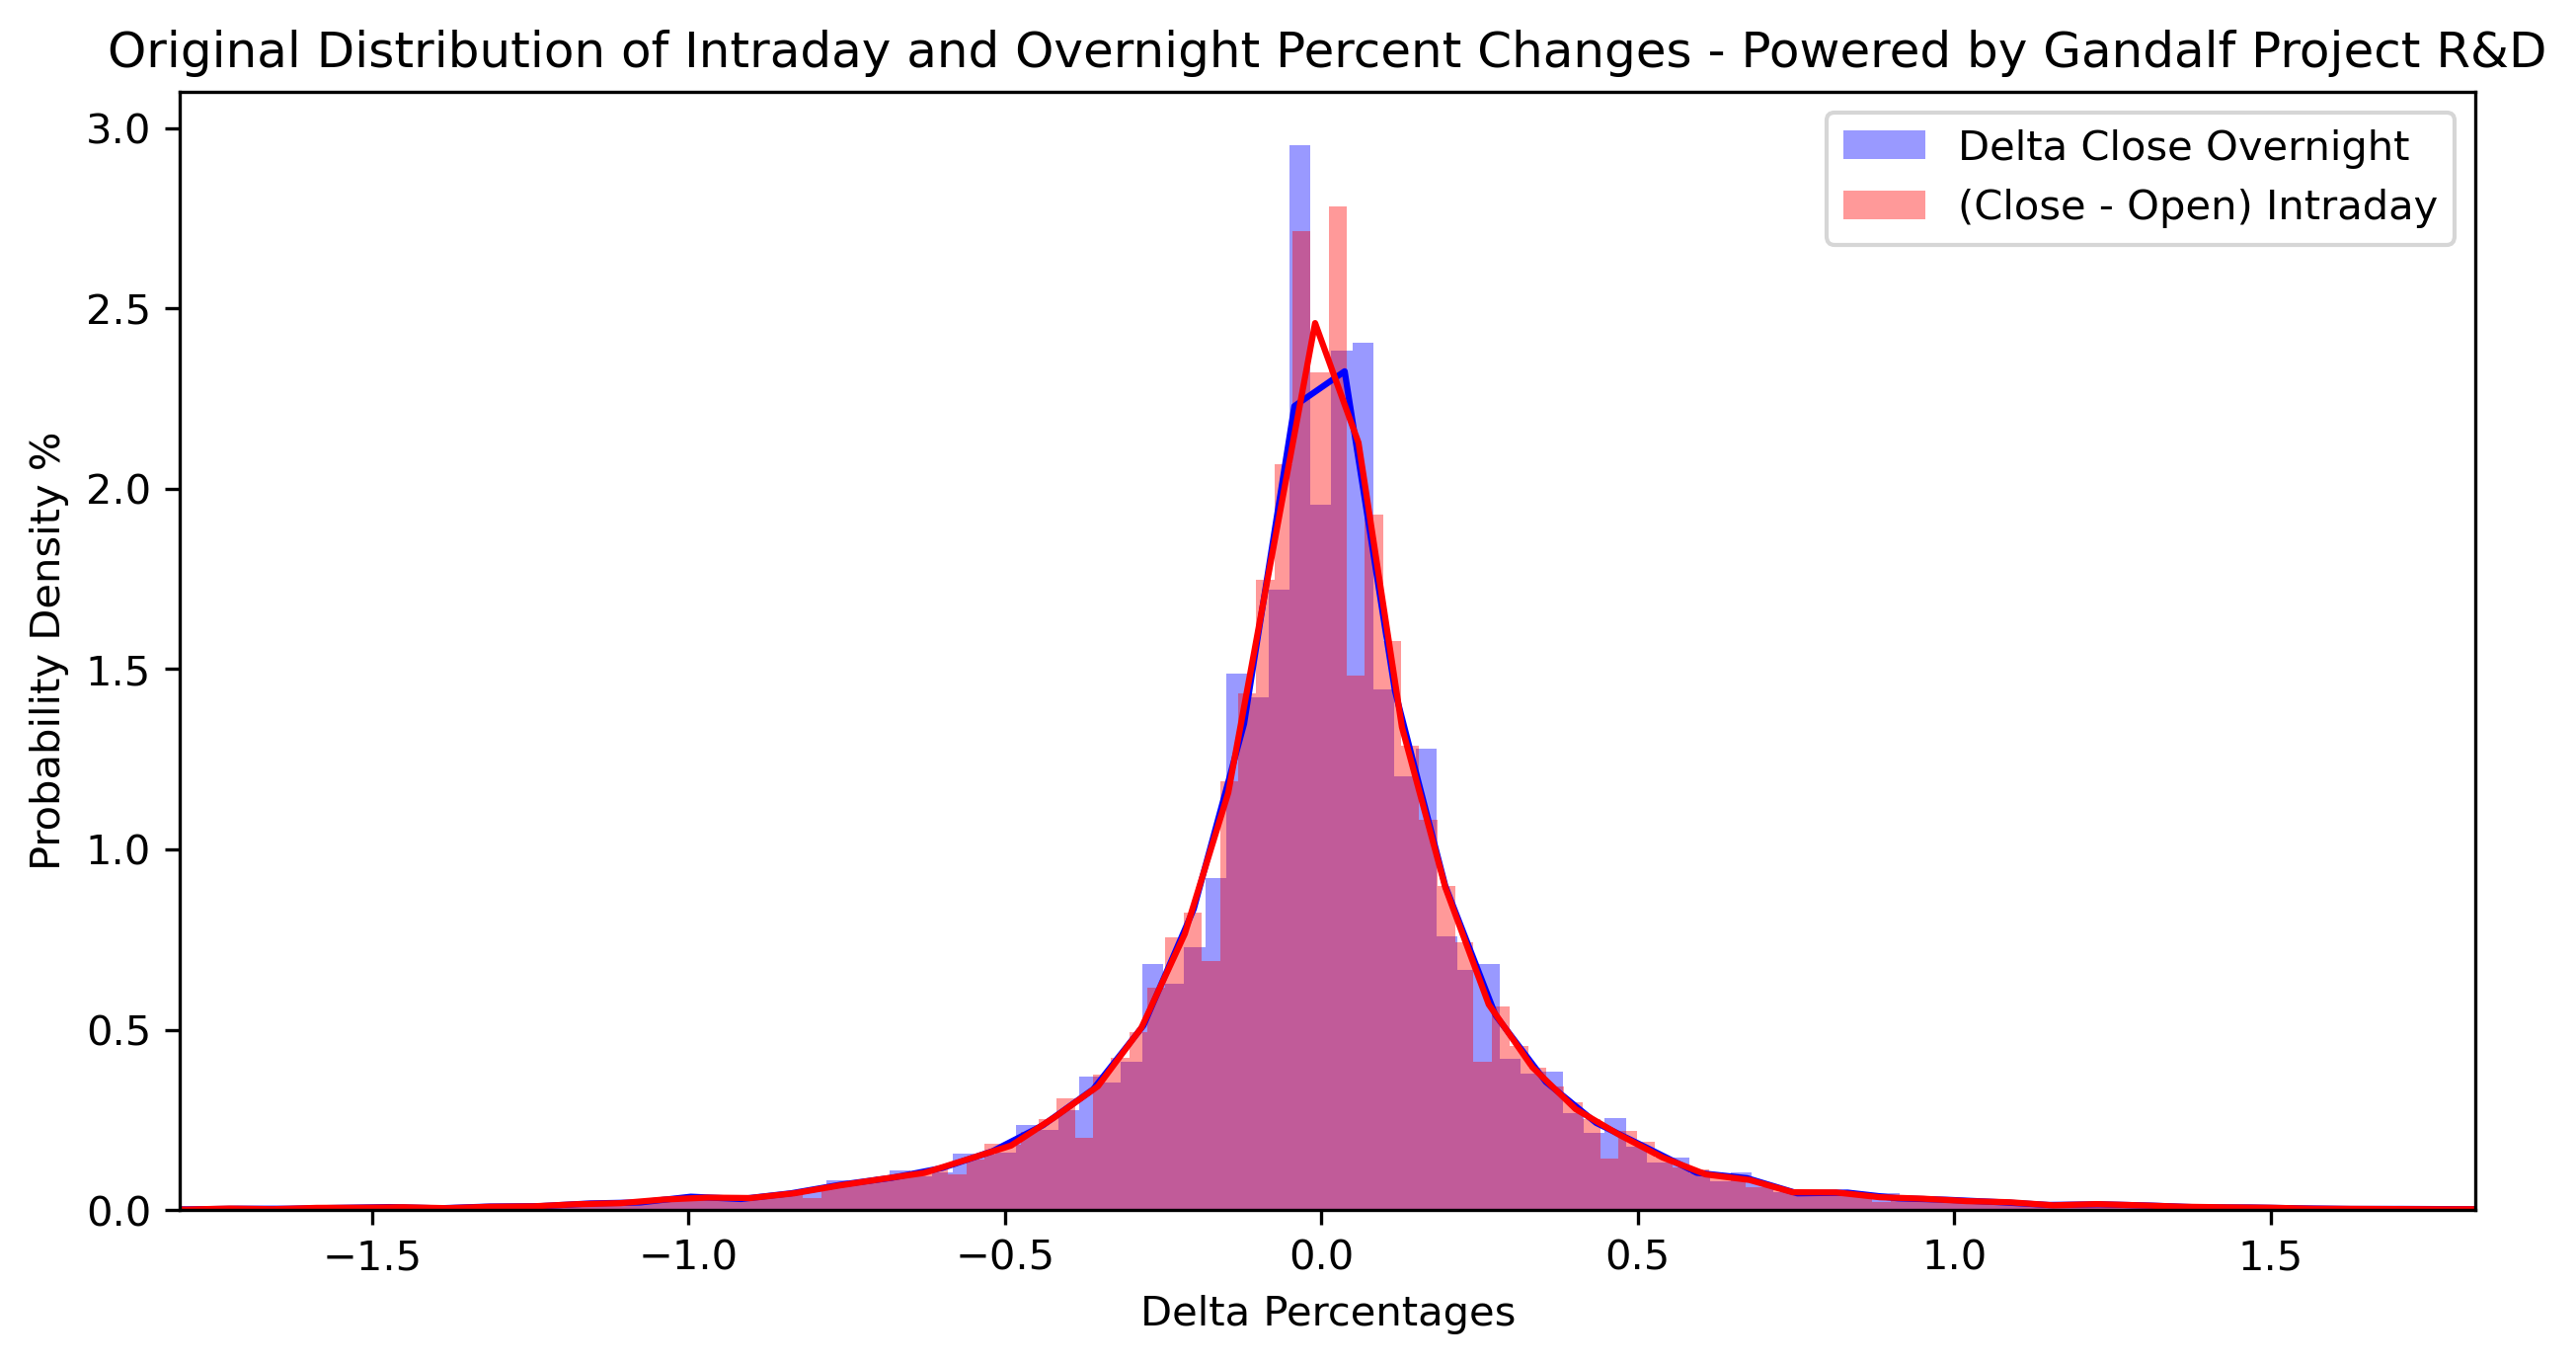

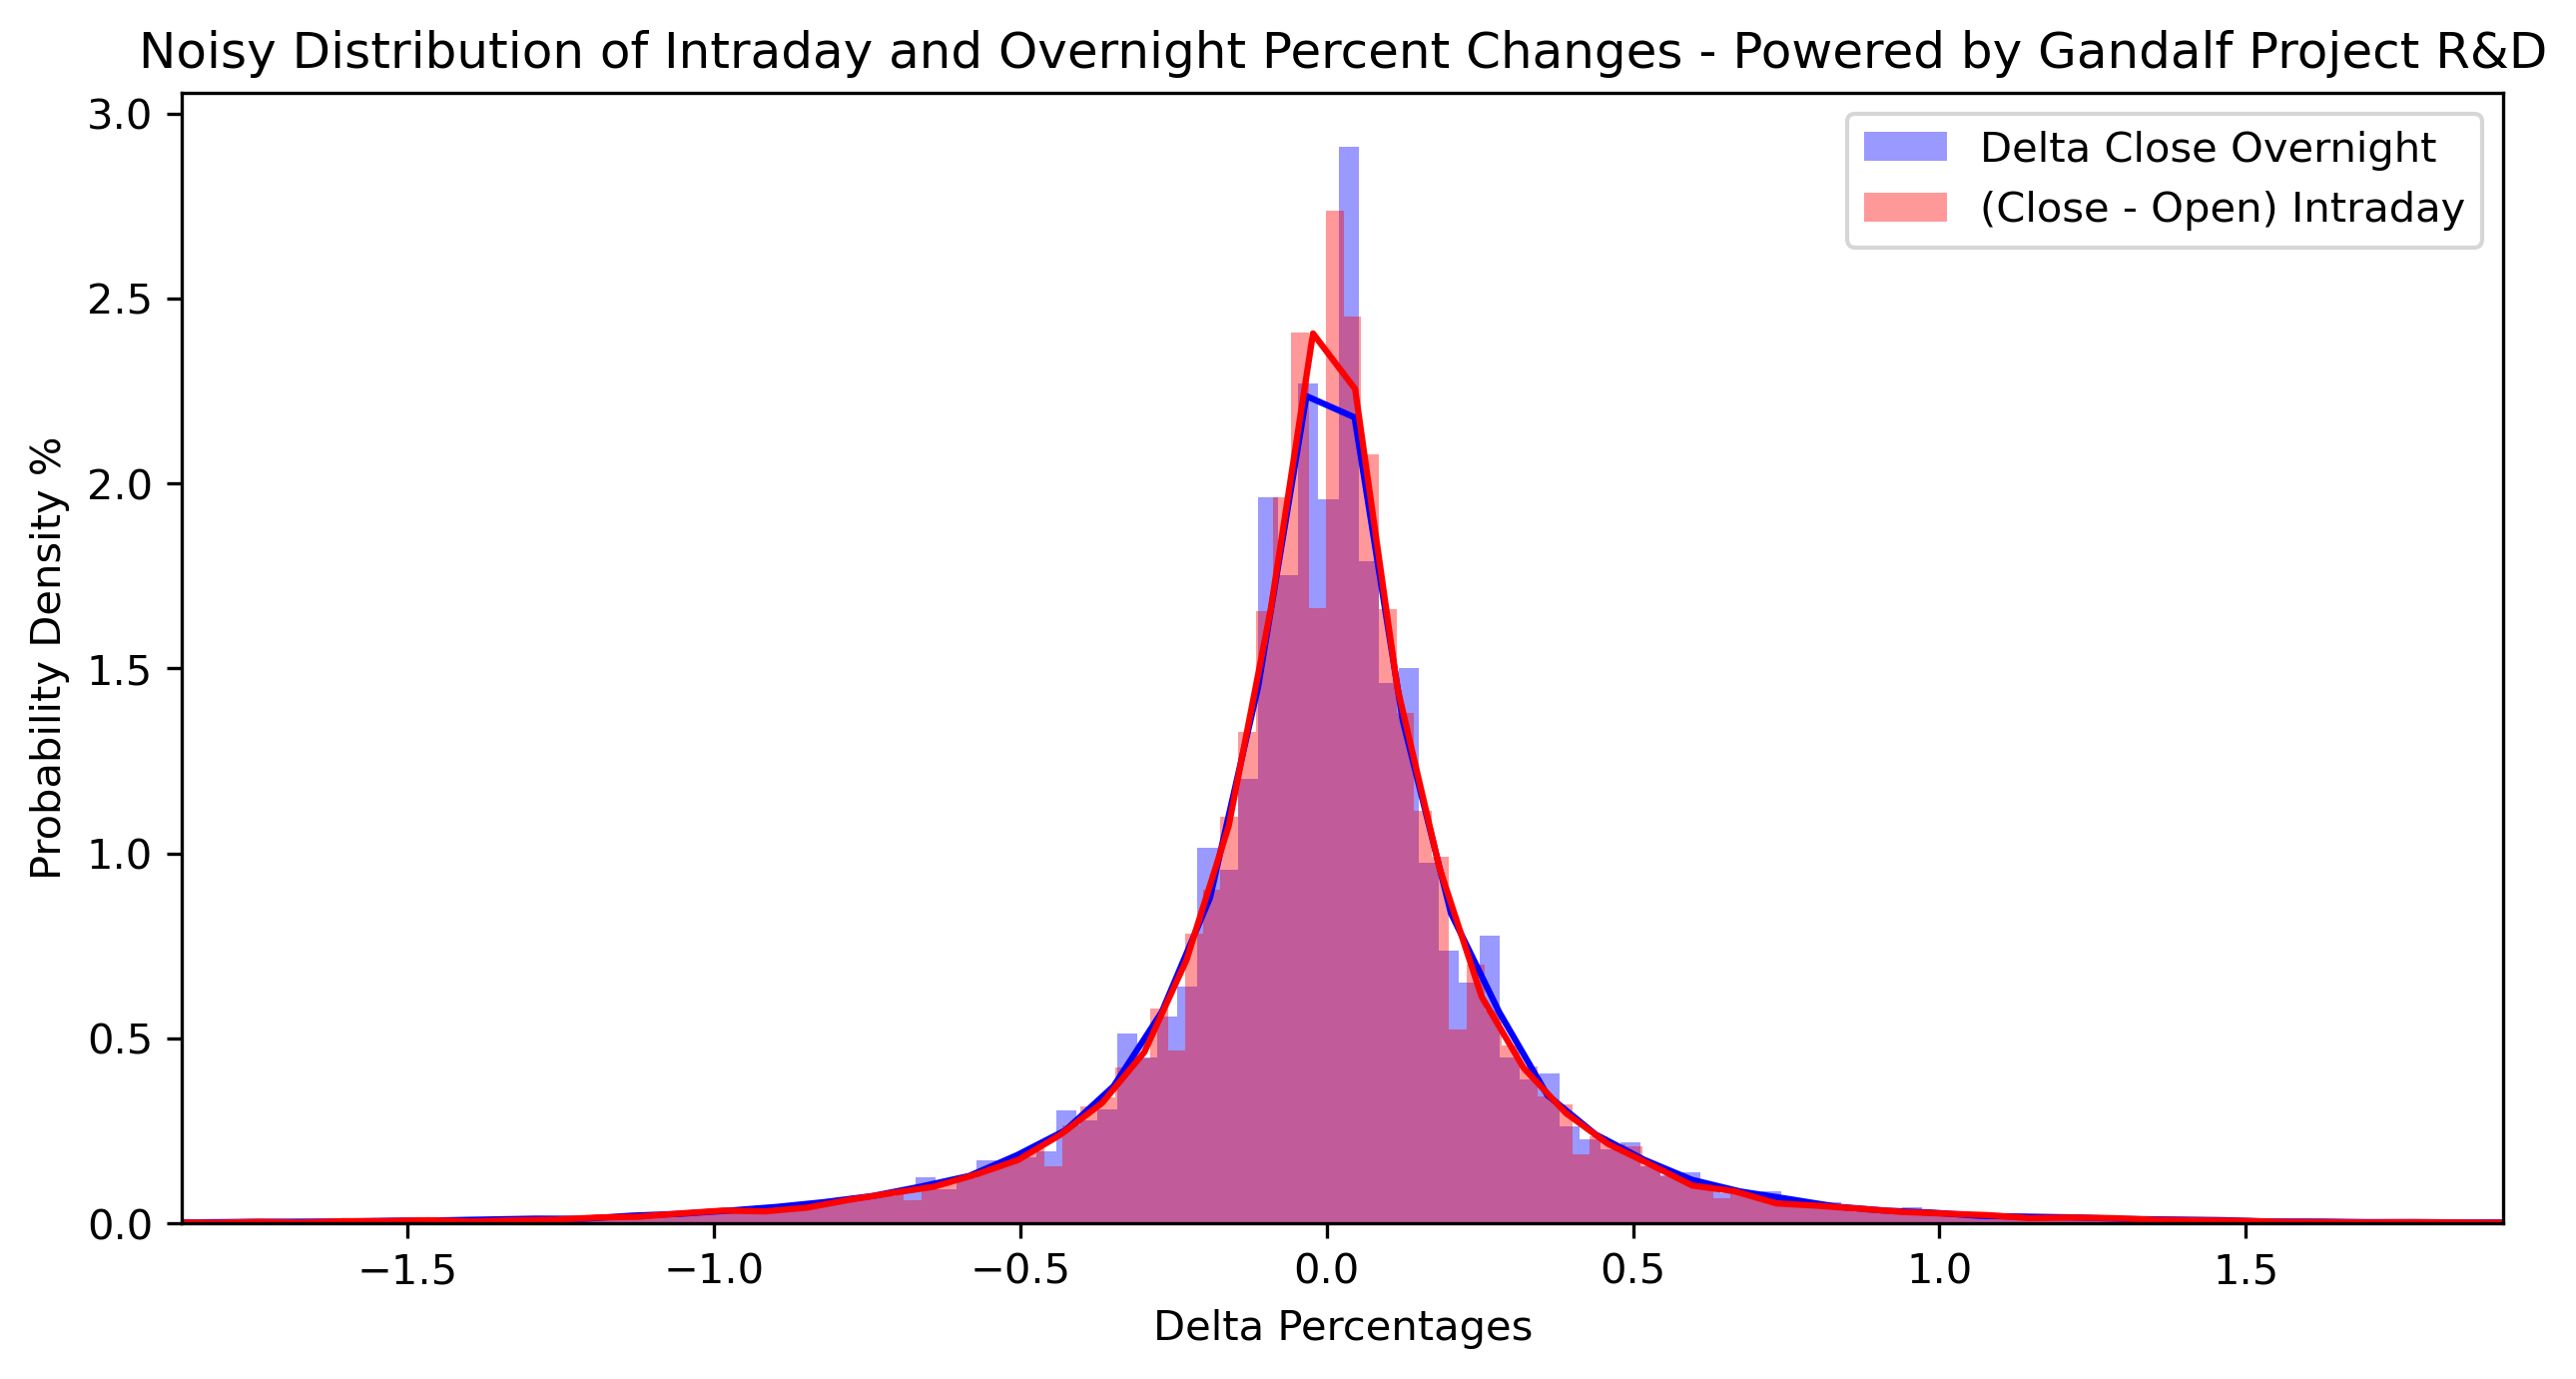

No handles with labels found to put in legend.


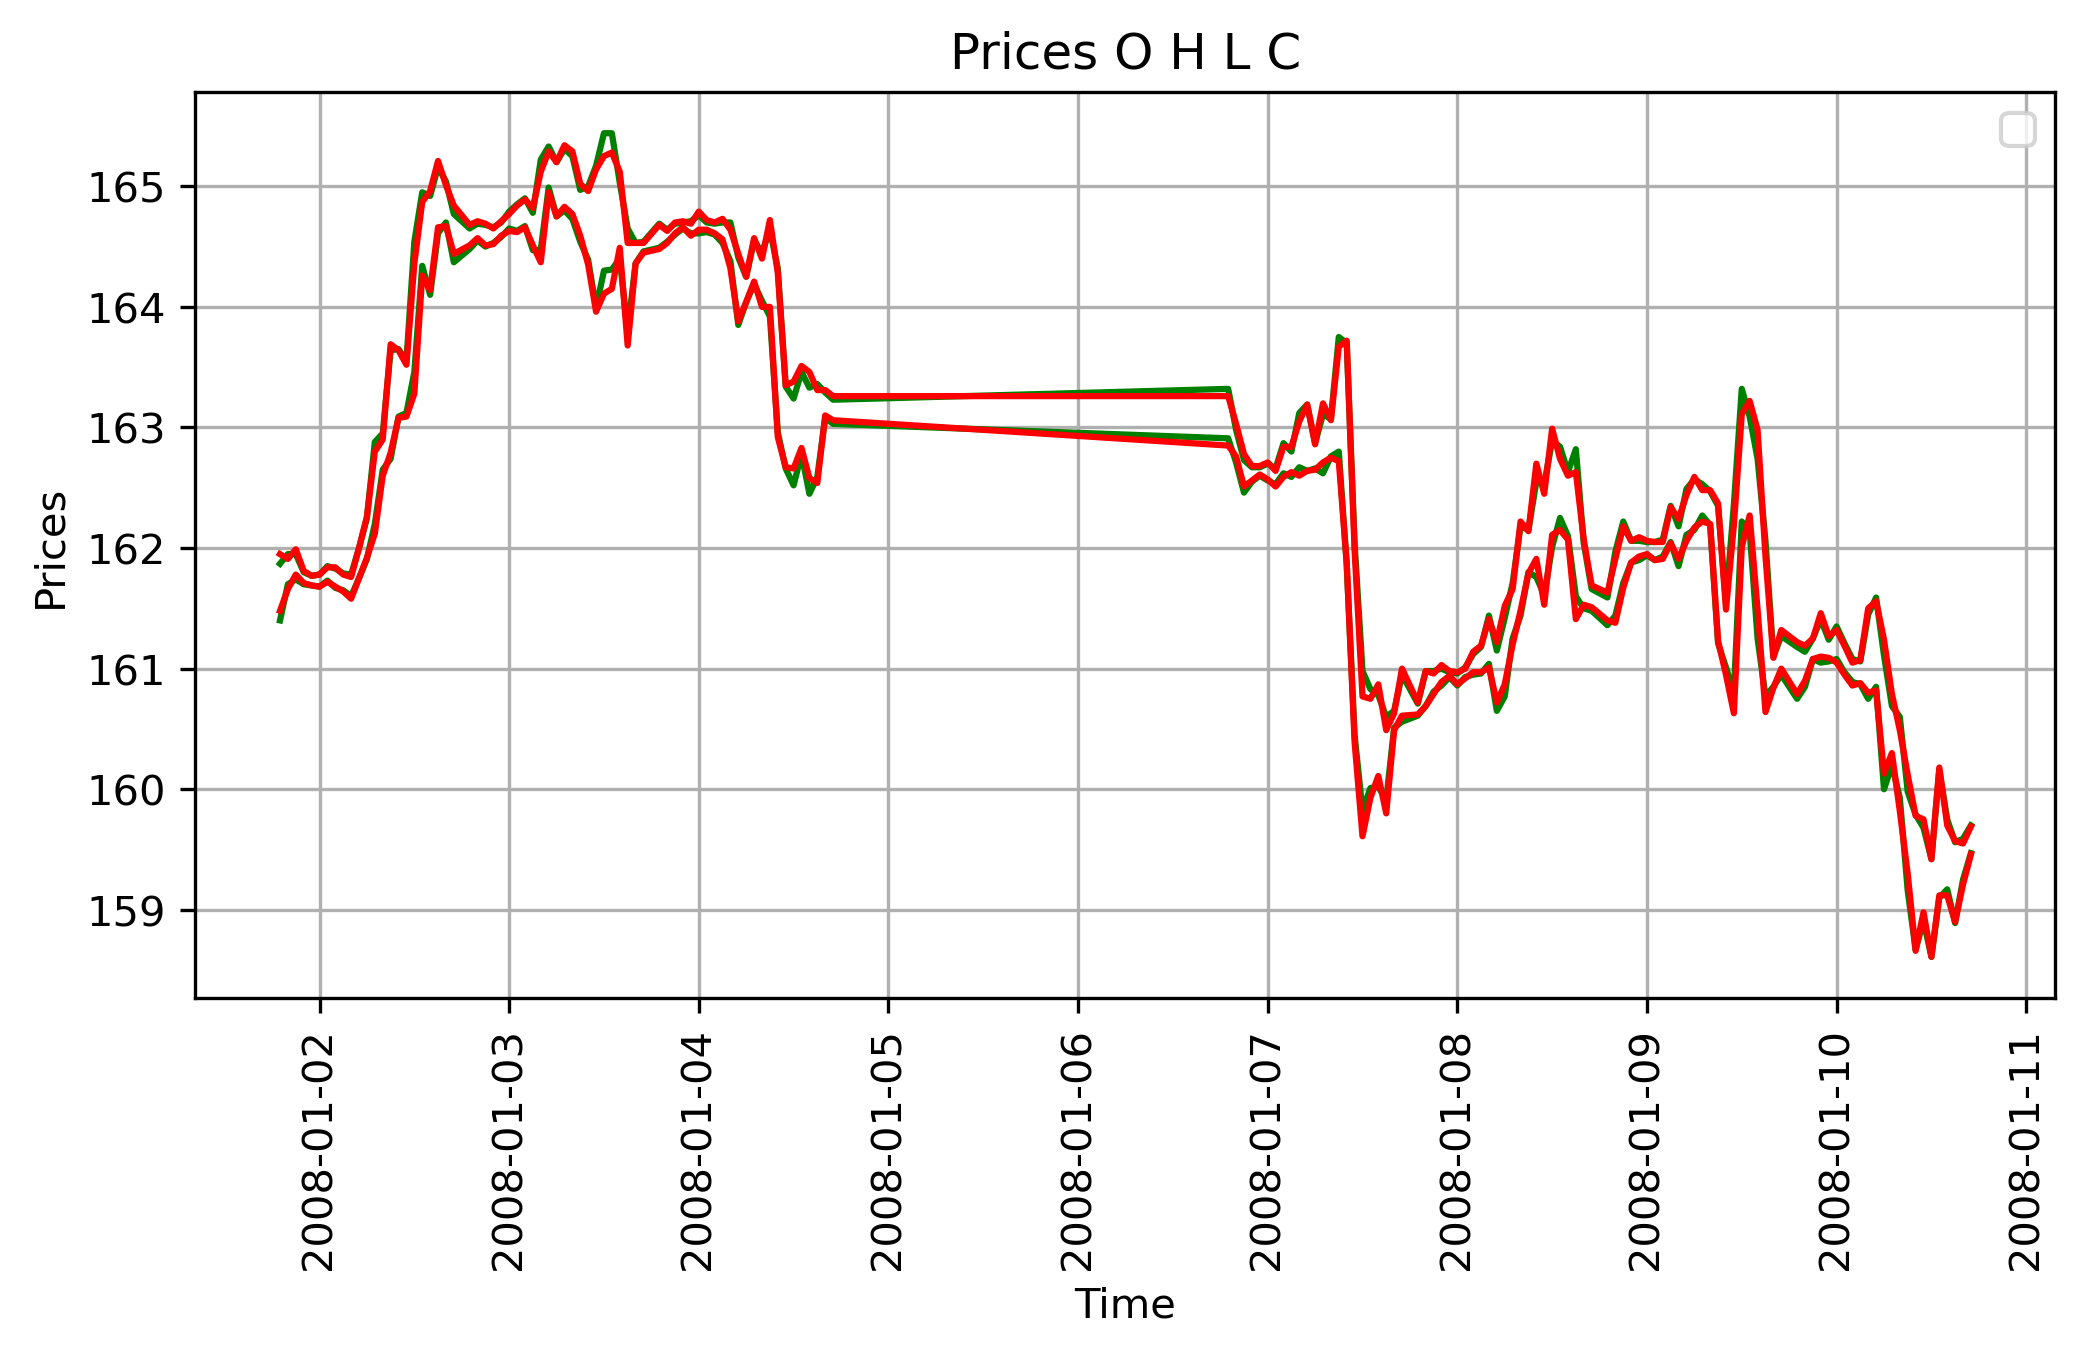

In [15]:
print(instrument[['Open','High','Low','Close','Volume']].head(10))

print("")
print(instrument.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).transpose())

stream = ohlc_noise_adder(instrument['Open'],
                          instrument['High'],
                          instrument['Low'],
                          instrument['Close'],
                          noisePercent)

new_instrument = instrument.copy()
new_instrument = new_instrument.drop(new_instrument.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis=1)
new_instrument['Noisy_Open'] = stream[0]
new_instrument['Noisy_High'] = stream[1]
new_instrument['Noisy_Low'] = stream[2]
new_instrument['Noisy_Close'] = stream[3]
new_instrument['Volume'] = instrument['Volume']
new_instrument['Noisy_OpenClosePerc'] = round((new_instrument['Noisy_Close'] - new_instrument['Noisy_Open']) 
                                              / new_instrument['Noisy_Open'] * 100,2)
new_instrument['Noisy_DeltaClosePerc'] = round((new_instrument['Noisy_Close'] - new_instrument['Noisy_Close'].shift(1)) 
                                               / new_instrument['Noisy_Close'].shift(1) * 100,2)

print("")
print(new_instrument[['Noisy_Open','Noisy_High','Noisy_Low','Noisy_Close','Volume']].head(10))

print("")
print(new_instrument.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).transpose())

new_instrument.to_csv(new_filename,index=True)

print("")
print('Serie addizionata di rumore (+/-',noisePercent,'% max del range di barra).')
print('File',new_filename,'esportato!')

# MODULO GRAFICO **************************************************************************************************

# codice per limitare automaticamente il grafico della distribuzione
a = np.array(instrument['DeltaClosePerc'].dropna(0))
b = np.array(instrument['OpenClosePerc'].dropna(0))
p1 = np.percentile(a, 99.9)
p2 = np.percentile(b, 99.9)
m1 = np.percentile(a, 0.1)
m2 = np.percentile(b, 0.1)
maxsns = max(p1,p2)
minsns = min(m1,m2)
#print(p1,p2)
#print(m1,m2)
#print(maxsns,minsns)

plt.figure(figsize=(10,5),dpi=300)
sns.distplot(instrument['DeltaClosePerc'].dropna(), bins=300, color='b', label='Delta Close Overnight')
sns.distplot(instrument['OpenClosePerc'].dropna(), bins=300, color='r', label='(Close - Open) Intraday')
plt.xlim(xmin = minsns, xmax = maxsns)
plt.title("Original Distribution of Intraday and Overnight Percent Changes - Powered by Gandalf Project R&D")
plt.xlabel("Delta Percentages")
plt.ylabel("Probability Density %")
plt.legend()
plt.show()

# codice per limitare automaticamente il grafico della distribuzione
a = np.array(new_instrument['Noisy_DeltaClosePerc'].dropna(0))
b = np.array(new_instrument['Noisy_OpenClosePerc'].dropna(0))
np1 = np.percentile(a, 99.9)
np2 = np.percentile(b, 99.9)
nm1 = np.percentile(a, 0.1)
nm2 = np.percentile(b, 0.1)
nmaxsns = max(np1,np2)
nminsns = min(nm1,nm2)
#print(p1,p2)
#print(m1,m2)
#print(maxsns,minsns)

plt.figure(figsize=(10,5),dpi=300)
sns.distplot(new_instrument['Noisy_DeltaClosePerc'].dropna(), bins=300, color='b', label='Delta Close Overnight')
sns.distplot(new_instrument['Noisy_OpenClosePerc'].dropna(), bins=300, color='r', label='(Close - Open) Intraday')
plt.xlim(xmin = nminsns, xmax = nmaxsns)
plt.title("Noisy Distribution of Intraday and Overnight Percent Changes - Powered by Gandalf Project R&D")
plt.xlabel("Delta Percentages")
plt.ylabel("Probability Density %")
plt.legend()
plt.show()

plt.figure(figsize=(8,4), dpi=300)

#plt.plot(instrument['Open'][:161], color='green')
plt.plot(instrument['High'][:161], color='green')
plt.plot(instrument['Low'][:161], color='green')
#plt.plot(instrument['Close'][:161], color='green')

#plt.plot(new_instrument['Noisy_Open'][:161], color='red')
plt.plot(new_instrument['Noisy_High'][:161], color='red')
plt.plot(new_instrument['Noisy_Low'][:161], color='red')
#plt.plot(new_instrument['Noisy_Close'][:161], color='red')

plt.xlabel("Time")
plt.ylabel("Prices")
plt.title('Prices O H L C')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.legend()
plt.show()

# MODULO GRAFICO **************************************************************************************************

# CODICE COMPLETO #2

Il file contiene 68568 record
                       Open    High     Low   Close  Volume
Date_Time                                                  
2007-01-01 19:00:00  129.82  129.84  129.82  129.84       2
2007-01-01 19:00:00  129.82  129.89  129.68  129.68      97
2007-01-01 20:00:00  129.72  129.74  129.63  129.63      81
2007-01-01 21:00:00  129.68  129.69  129.59  129.61      74
2007-01-01 22:00:00  129.64  129.69  129.61  129.61      84
2007-01-01 23:00:00  129.64  129.64  129.43  129.44     406
2007-01-02 00:00:00  129.47  129.47  129.34  129.41     436
2007-01-02 01:00:00  129.41  129.56  129.40  129.56     103
2007-01-02 02:00:00  129.56  129.59  129.54  129.55      80
2007-01-02 03:00:00  129.59  129.68  129.59  129.68      96

                  count          mean           std    min      1%      5%  \
Open            68551.0    103.672641     36.130396  39.42  44.330   48.90   
High            68551.0    103.870684     36.176274  39.78  44.530   49.02   
Low            

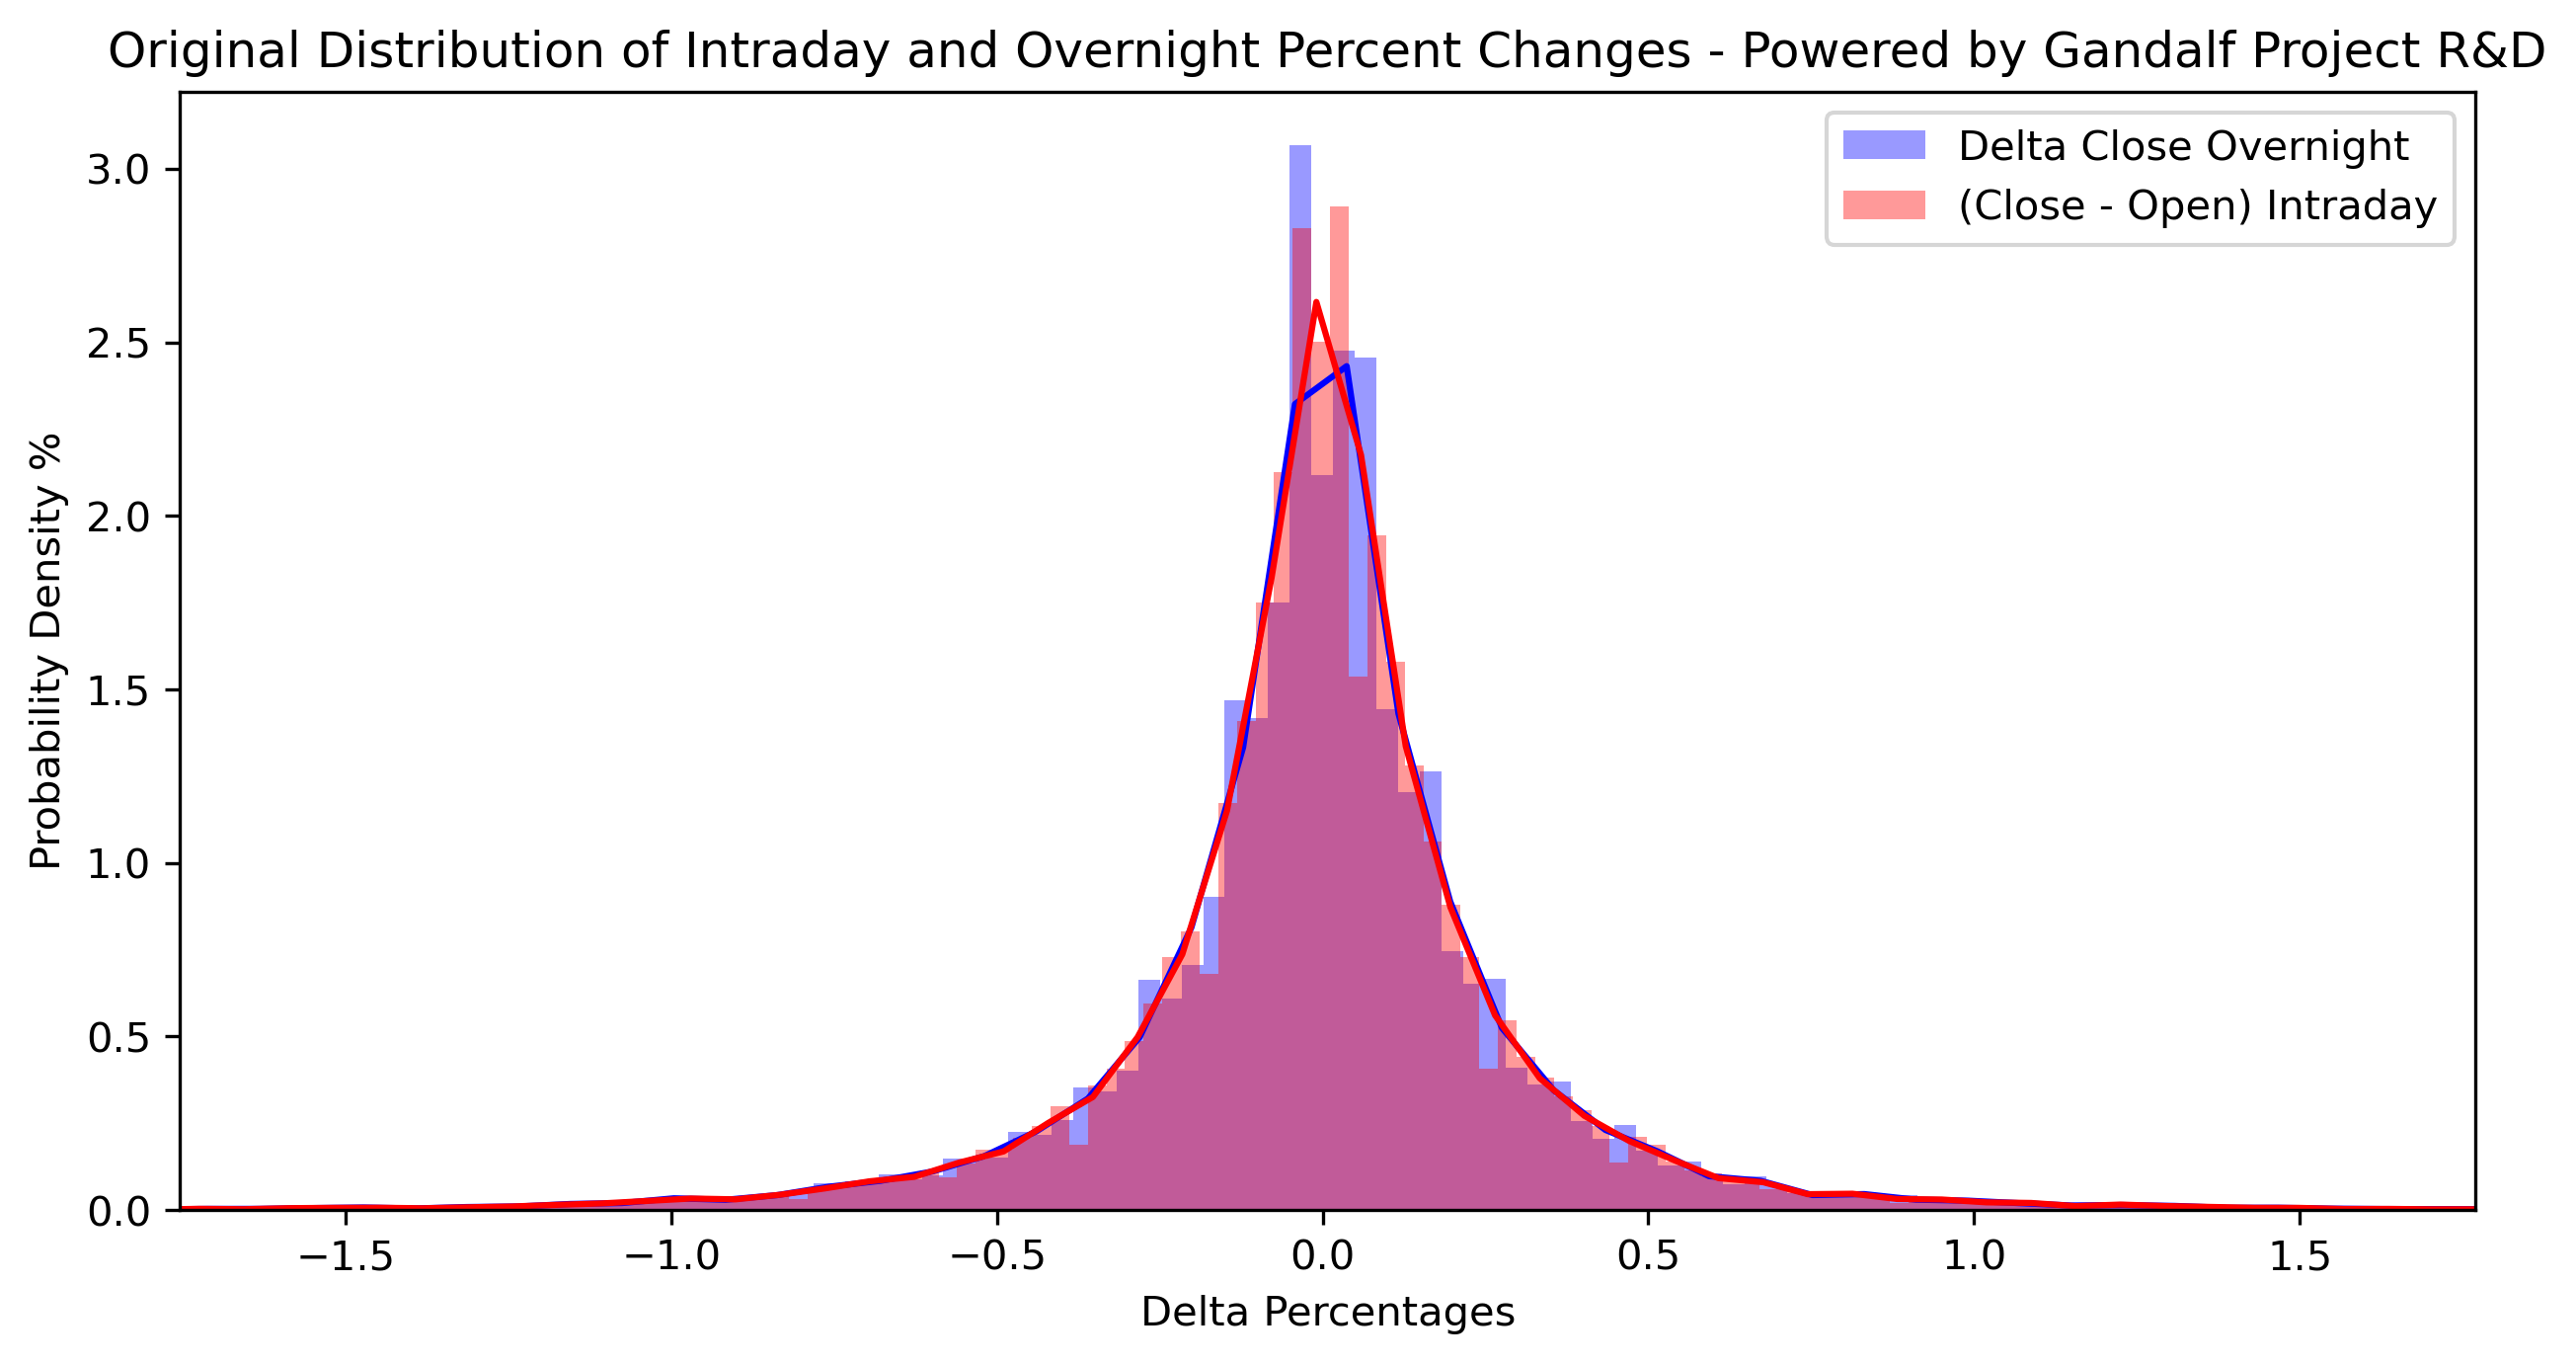

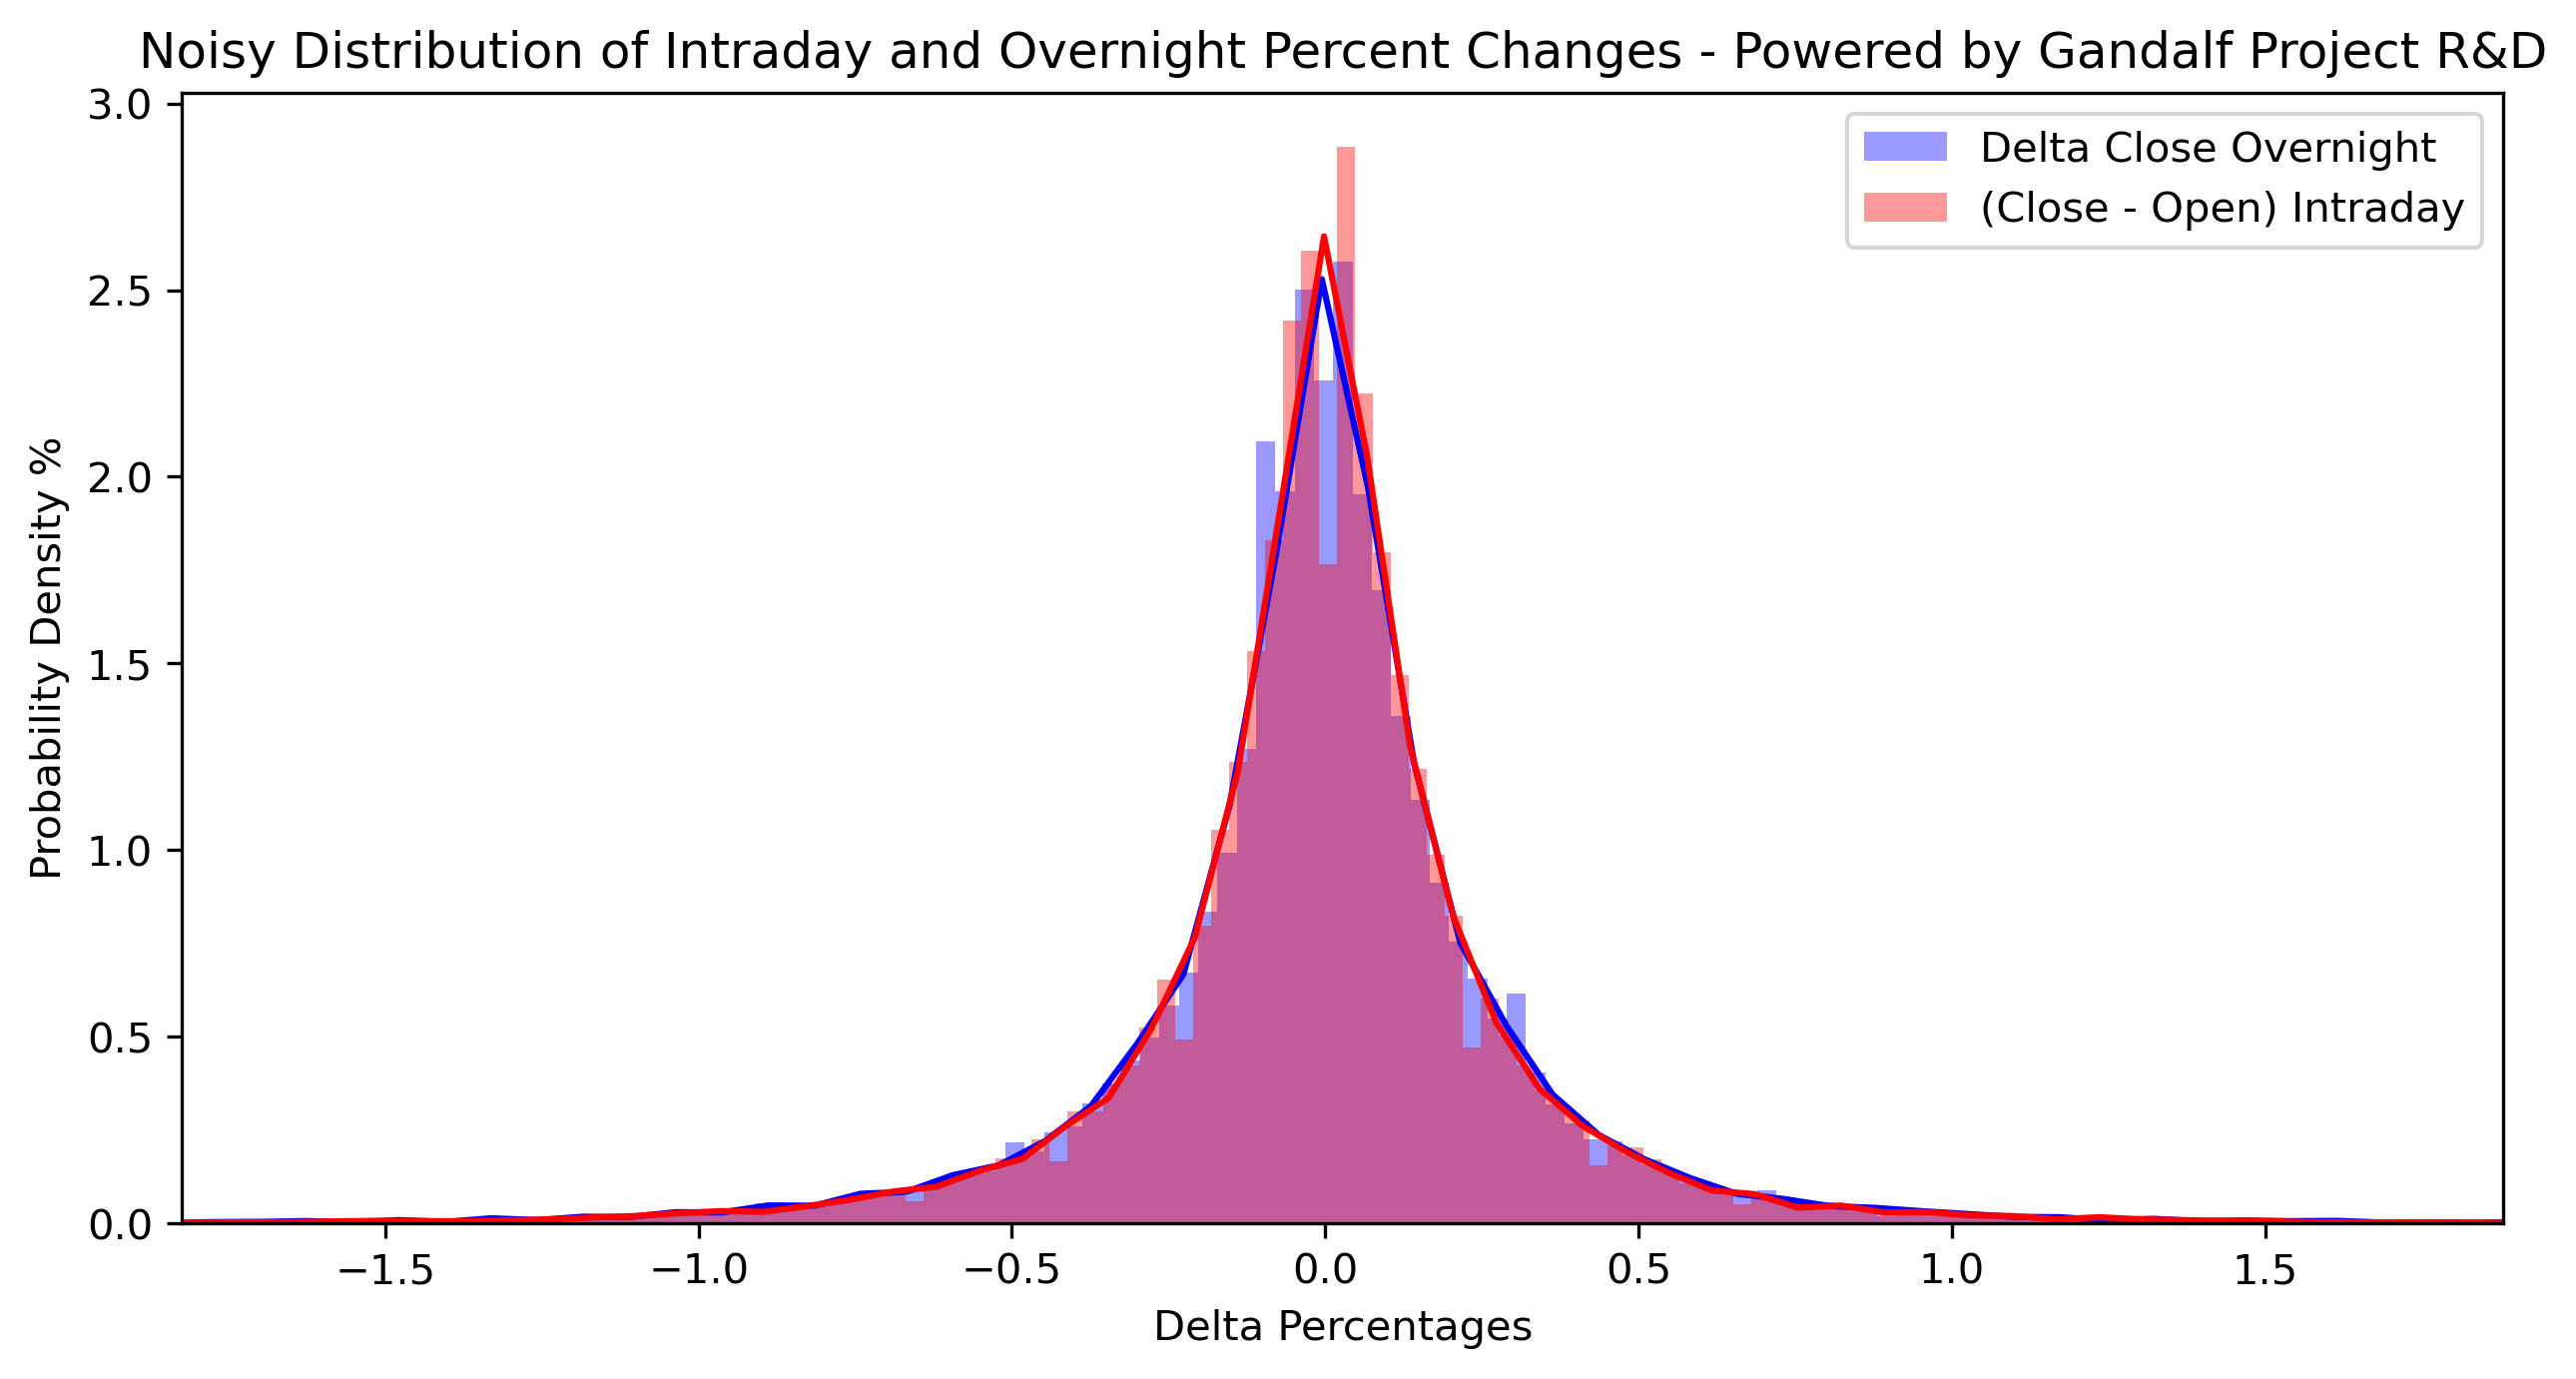

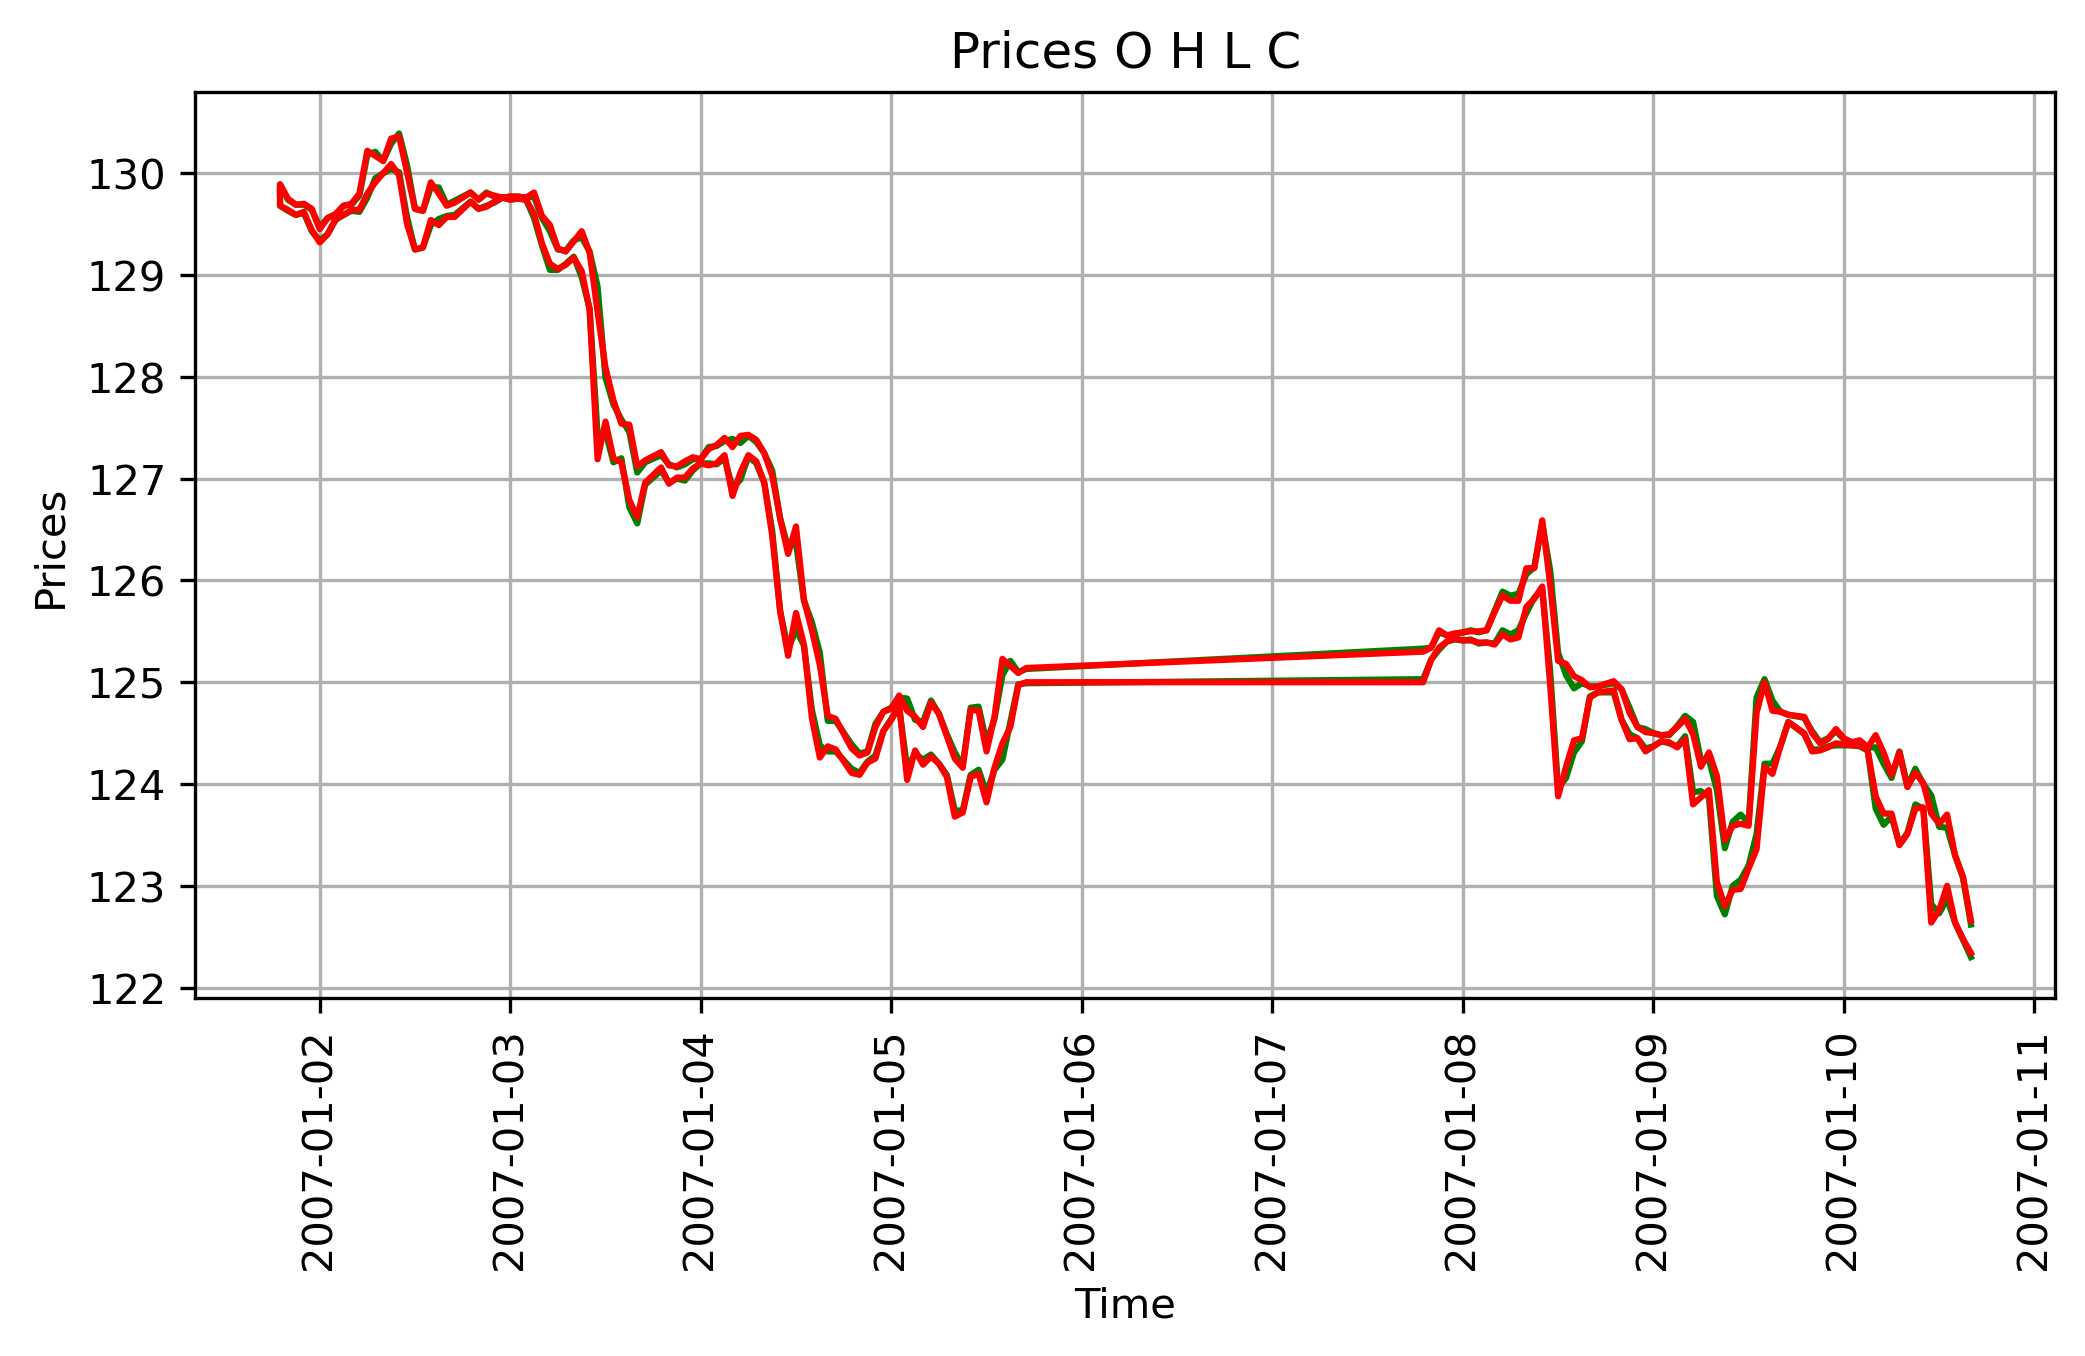


Serie addizionata di rumore (+/- 20 % max del range di barra).
File NoiseAddictedSerie.csv esportato!


In [16]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def single_noise_adder(array, single_range, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_array = np.zeros(len(array))
    i = 0
    while i < len(array):
        factor = np.random.uniform(-1, 1)
        new_array[i] = round(float(array[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range[i])), 2)
        i += 1
    return new_array

def ohlc_noise_adder(O, H, L, C, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_O = np.zeros(len(O))
    new_H = np.zeros(len(H))
    new_L = np.zeros(len(L))
    new_C = np.zeros(len(C))
    i = 0
    while i < len(O):
        factor = np.random.uniform(-1, 1)
        single_range = H[i] - L[i]
        new_O[i] = round(float(O[i]) + factor * (float(percentage_noise_addiction) / 100) 
                         * abs(float(single_range)), 2)
        new_H[i] = round(float(H[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        new_L[i] = round(float(L[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        new_C[i] = round(float(C[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        #print(new_O[i],new_H[i],new_L[i],new_C[i])
        app = [new_O[i],new_H[i],new_L[i],new_C[i]]
        app.sort()
        #print(app)
        new_O[i] = new_O[i]
        new_H[i] = app[-1]
        new_L[i] = app[0]
        new_C[i] = new_C[i]
        #print("new:",new_O[i],new_H[i],new_L[i],new_C[i])
        i += 1
    return new_O, new_H, new_L, new_C
    
# INPUTS **********************************************************************************************************

noisePercent = 20

filename = "@CL_60min.txt"

startDate = "20070101"
endDate = "20180810"

new_filename = "NoiseAddictedSerie.csv"

# INPUTS **********************************************************************************************************

startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Up','Down'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument['Volume'] = abs(instrument['Up'] + instrument['Down'])
instrument.drop('Date_Time',axis=1,inplace=True)
instrument.drop('Up',axis=1,inplace=True)
instrument.drop('Down',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['Range'] = round(instrument['High'] - instrument['Low'],2)
instrument['Body'] = abs(instrument['Open'] - instrument['Close'])
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)

instrument = instrument.loc[startDateParsed:endDateParsed]

print(instrument[['Open','High','Low','Close','Volume']].head(10))

print("")
print(instrument.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).transpose())

stream = ohlc_noise_adder(instrument['Open'],
                          instrument['High'],
                          instrument['Low'],
                          instrument['Close'],
                          noisePercent)

new_instrument = instrument.copy()
new_instrument = new_instrument.drop(new_instrument.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis=1)
new_instrument['Noisy_Open'] = stream[0]
new_instrument['Noisy_High'] = stream[1]
new_instrument['Noisy_Low'] = stream[2]
new_instrument['Noisy_Close'] = stream[3]
new_instrument['Volume'] = instrument['Volume']
new_instrument['Noisy_OpenClosePerc'] = round((new_instrument['Noisy_Close'] - new_instrument['Noisy_Open']) 
                                              / new_instrument['Noisy_Open'] * 100,2)
new_instrument['Noisy_DeltaClosePerc'] = round((new_instrument['Noisy_Close'] - new_instrument['Noisy_Close'].shift(1)) 
                                               / new_instrument['Noisy_Close'].shift(1) * 100,2)

print("")
print(new_instrument[['Noisy_Open','Noisy_High','Noisy_Low','Noisy_Close','Volume']].head(10))

print("")
print(new_instrument.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).transpose())

new_instrument.to_csv(new_filename,index=True)

# MODULO GRAFICO **************************************************************************************************

# codice per limitare automaticamente il grafico della distribuzione
a = np.array(instrument['DeltaClosePerc'].dropna(0))
b = np.array(instrument['OpenClosePerc'].dropna(0))
p1 = np.percentile(a, 99.9)
p2 = np.percentile(b, 99.9)
m1 = np.percentile(a, 0.1)
m2 = np.percentile(b, 0.1)
maxsns = max(p1,p2)
minsns = min(m1,m2)
#print(p1,p2)
#print(m1,m2)
#print(maxsns,minsns)

plt.figure(figsize=(10,5),dpi=300)
sns.distplot(instrument['DeltaClosePerc'].dropna(), bins=300, color='b', label='Delta Close Overnight')
sns.distplot(instrument['OpenClosePerc'].dropna(), bins=300, color='r', label='(Close - Open) Intraday')
plt.xlim(xmin = minsns, xmax = maxsns)
plt.title("Original Distribution of Intraday and Overnight Percent Changes - Powered by Gandalf Project R&D")
plt.xlabel("Delta Percentages")
plt.ylabel("Probability Density %")
plt.legend()
plt.show()

# codice per limitare automaticamente il grafico della distribuzione
a = np.array(new_instrument['Noisy_DeltaClosePerc'].dropna(0))
b = np.array(new_instrument['Noisy_OpenClosePerc'].dropna(0))
np1 = np.percentile(a, 99.9)
np2 = np.percentile(b, 99.9)
nm1 = np.percentile(a, 0.1)
nm2 = np.percentile(b, 0.1)
nmaxsns = max(np1,np2)
nminsns = min(nm1,nm2)
#print(p1,p2)
#print(m1,m2)
#print(maxsns,minsns)

plt.figure(figsize=(10,5),dpi=300)
sns.distplot(new_instrument['Noisy_DeltaClosePerc'].dropna(), bins=300, color='b', label='Delta Close Overnight')
sns.distplot(new_instrument['Noisy_OpenClosePerc'].dropna(), bins=300, color='r', label='(Close - Open) Intraday')
plt.xlim(xmin = nminsns, xmax = nmaxsns)
plt.title("Noisy Distribution of Intraday and Overnight Percent Changes - Powered by Gandalf Project R&D")
plt.xlabel("Delta Percentages")
plt.ylabel("Probability Density %")
plt.legend()
plt.show()

plt.figure(figsize=(8,4), dpi=300)

#plt.plot(instrument['Open'][:161], color='green')
plt.plot(instrument['High'][:161], color='green')
plt.plot(instrument['Low'][:161], color='green')
#plt.plot(instrument['Close'][:161], color='green')

#plt.plot(new_instrument['Noisy_Open'][:161], color='red')
plt.plot(new_instrument['Noisy_High'][:161], color='red')
plt.plot(new_instrument['Noisy_Low'][:161], color='red')
#plt.plot(new_instrument['Noisy_Close'][:161], color='red')

plt.xlabel("Time")
plt.ylabel("Prices")
plt.title('Prices O H L C')
plt.xticks(rotation='vertical')
plt.grid(True)
#plt.legend()
plt.show()

# MODULO GRAFICO **************************************************************************************************

print("")
print('Serie addizionata di rumore (+/-',noisePercent,'% max del range di barra).')
print('File',new_filename,'esportato!')